In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# pip install jedi
# for auto completion
pd.options.display.max_columns = 500
pd.options.display.max_rows = 200
# to set dataframes to show more cols & rows

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
# import statsmodels for statistical modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing VIF

from sklearn.metrics import confusion_matrix, classification_report
# import scikit-learn for machine learning

import matplotlib.cm as cm
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel


# EDA Process:- Step 1:- Data Understanding - Description of Data 

In [2]:
df = pd.read_csv('financial_data.csv') # read the csv file

In [3]:
df.head() # display the first 5 row 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
df.tail() # display the last 5 row 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+0

In [5]:
df.shape # rows and cloumns

(6819, 96)

In [6]:
df.info() # Non-Null Count and Data Type   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [7]:
df.describe() # Descriptive Statstics of our numerical features

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

# Step 2:-  Data Cleaning 

In [8]:
df.isnull().sum() # To see the count of null values 

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B) 

#  Handling Outliers

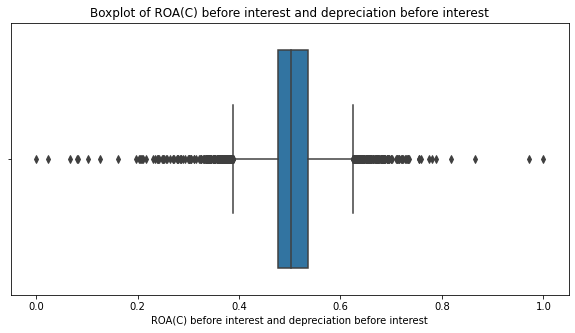

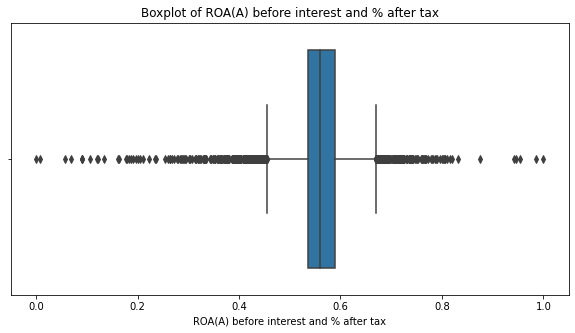

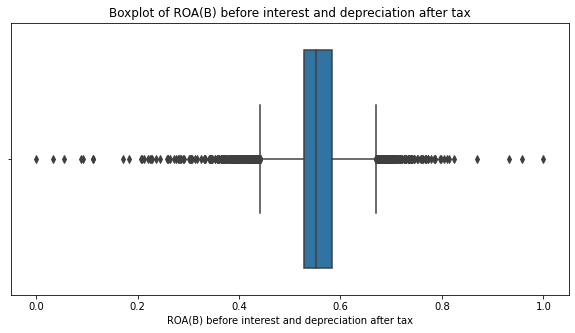

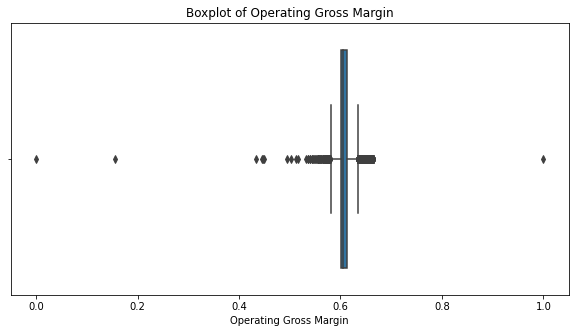

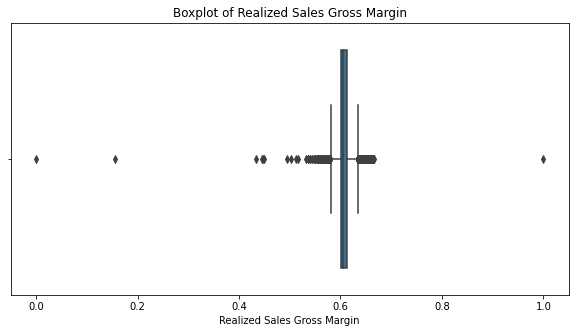

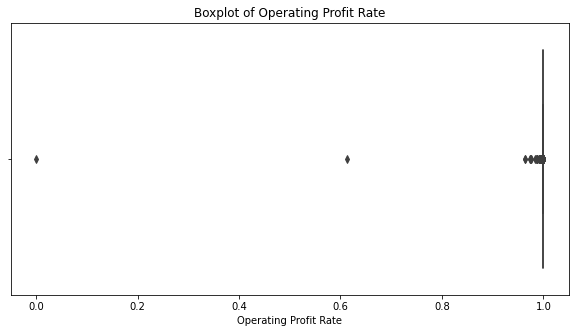

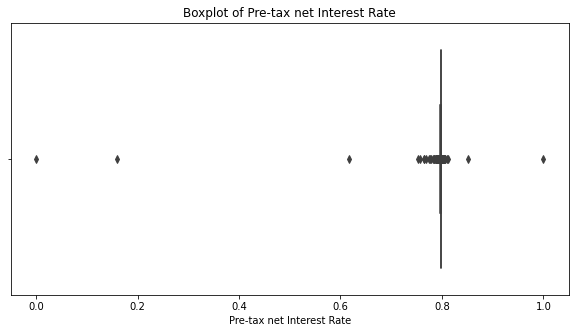

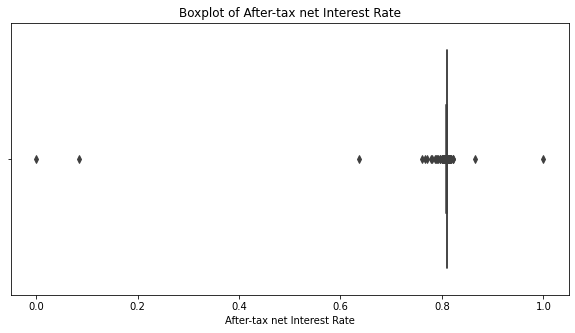

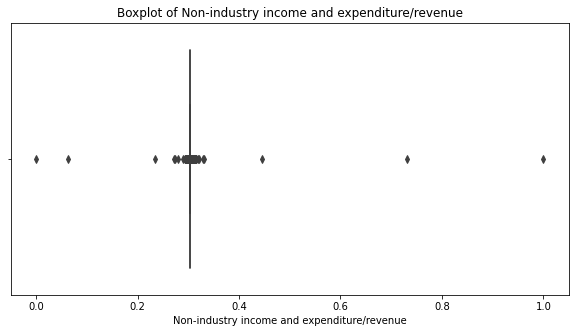

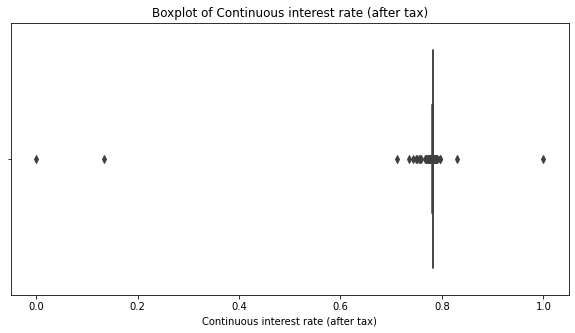

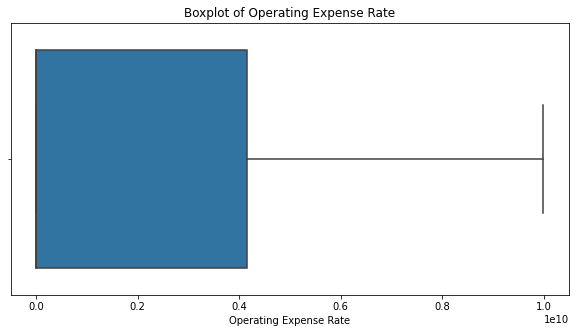

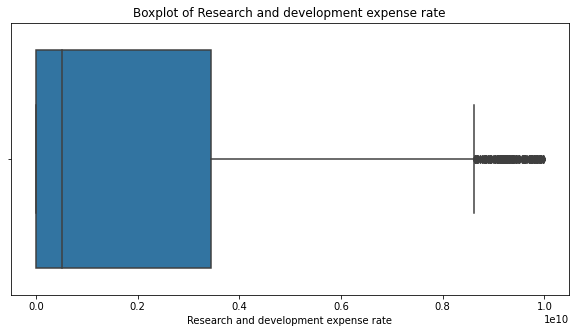

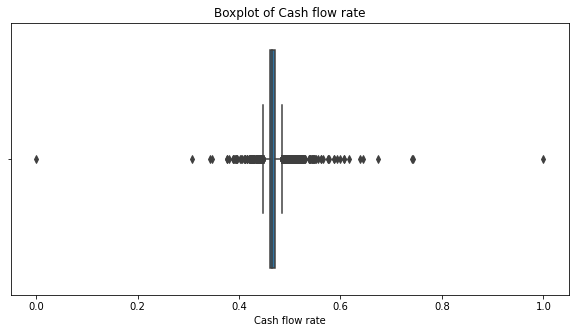

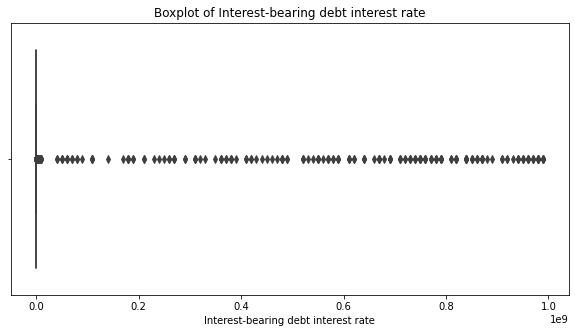

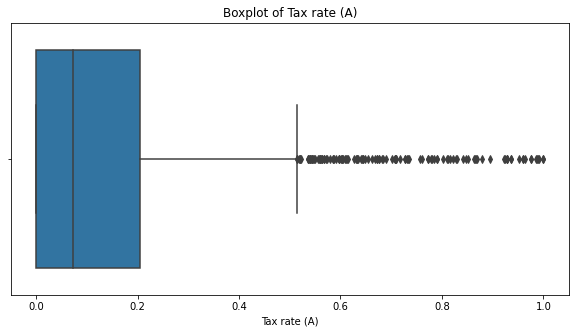

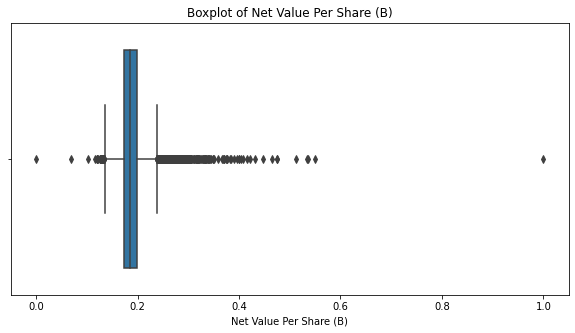

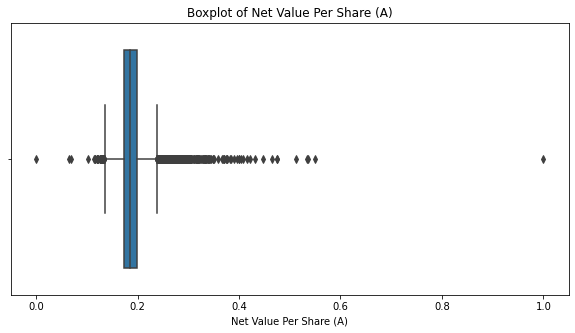

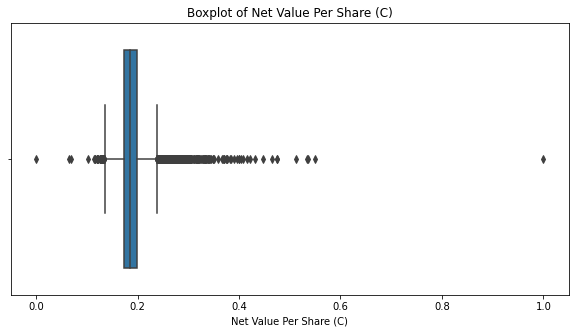

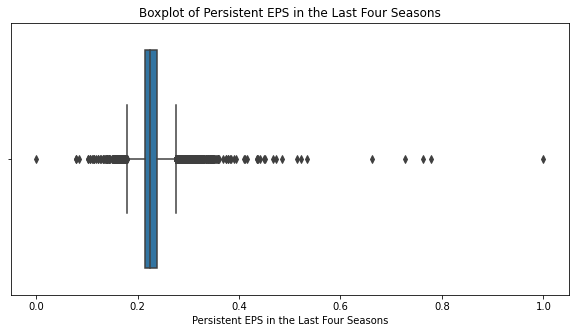

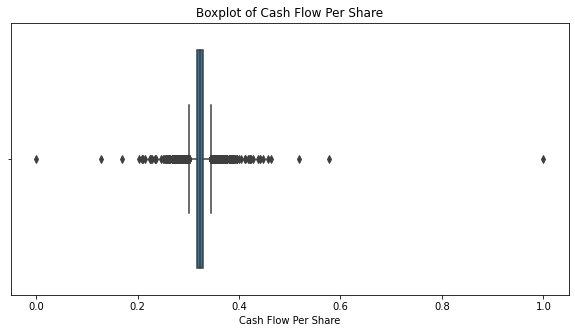

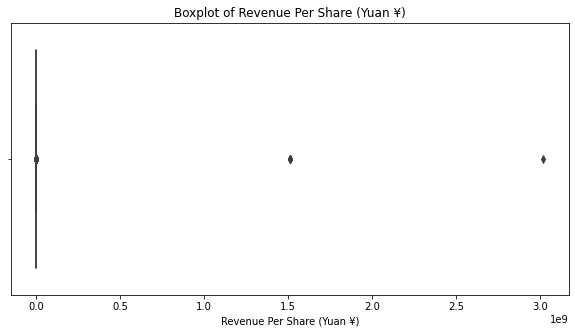

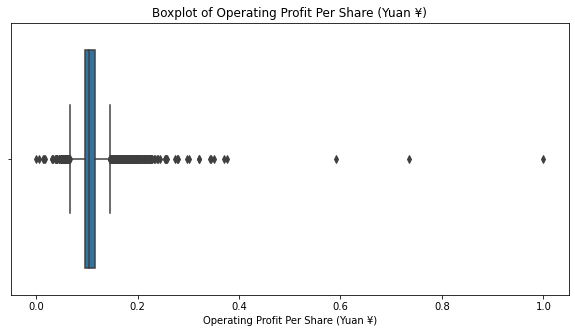

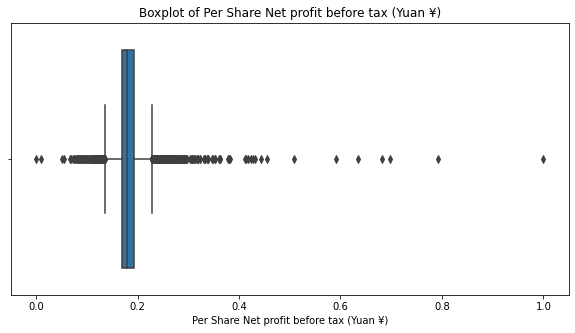

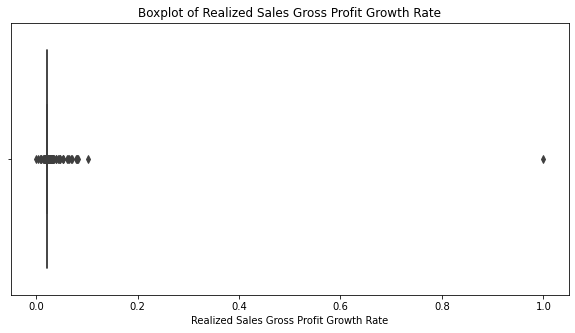

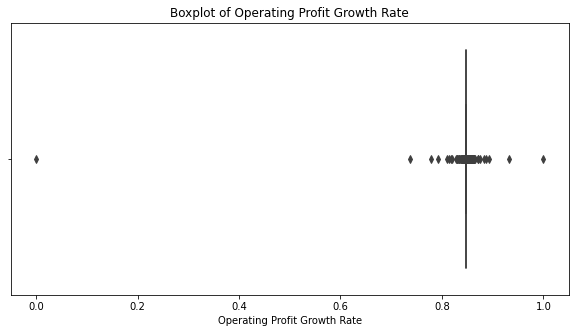

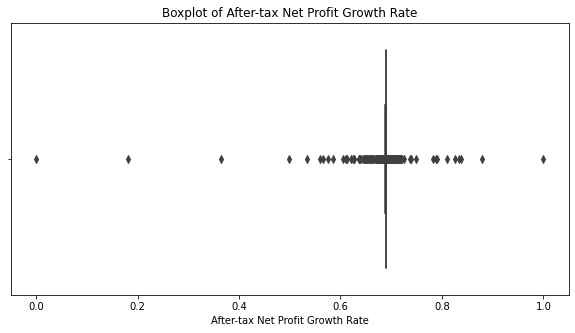

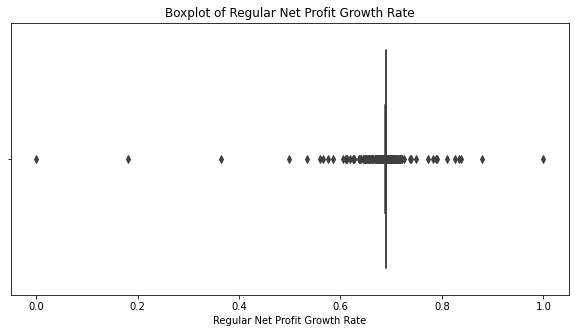

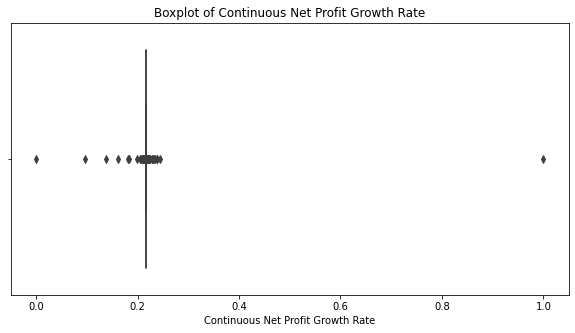

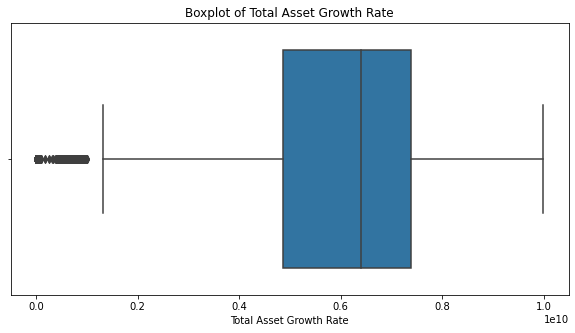

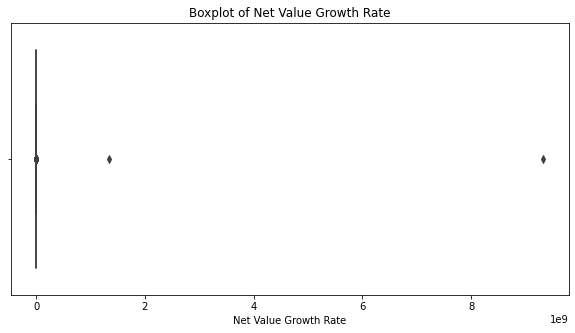

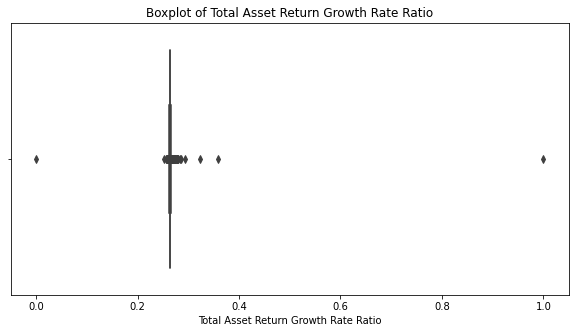

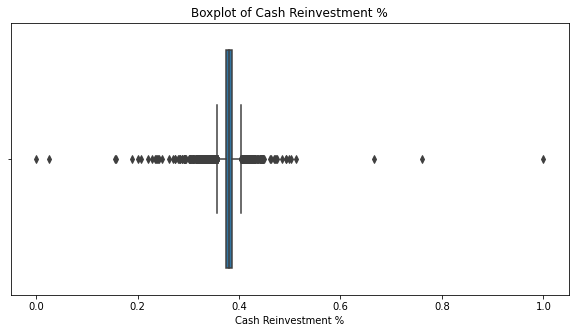

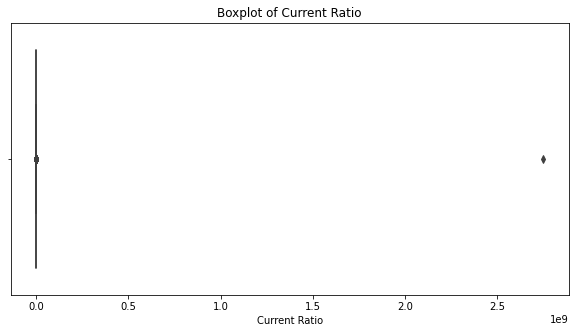

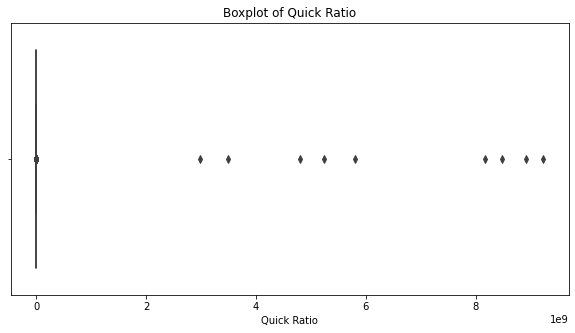

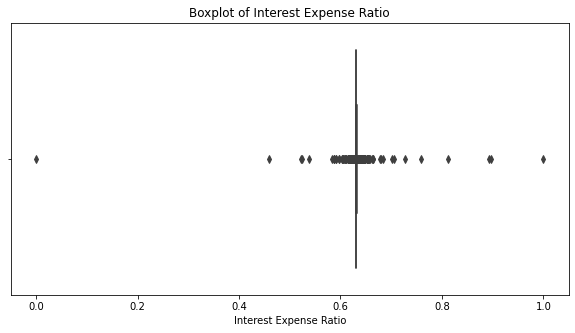

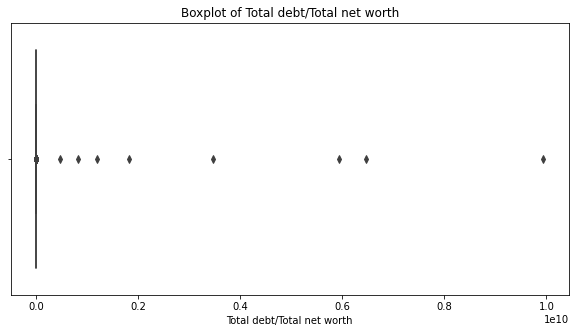

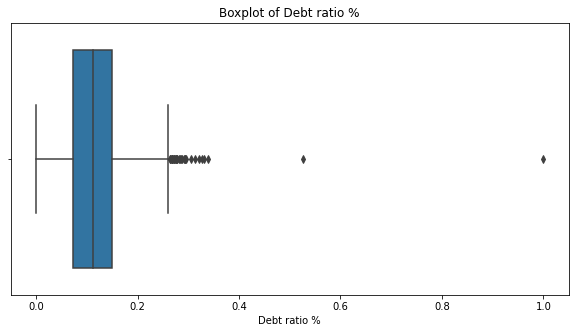

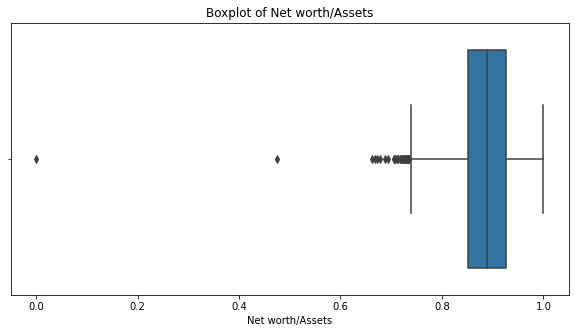

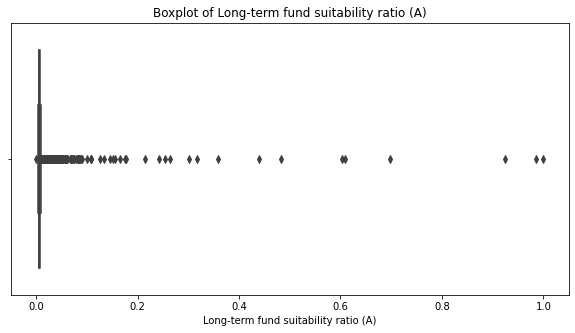

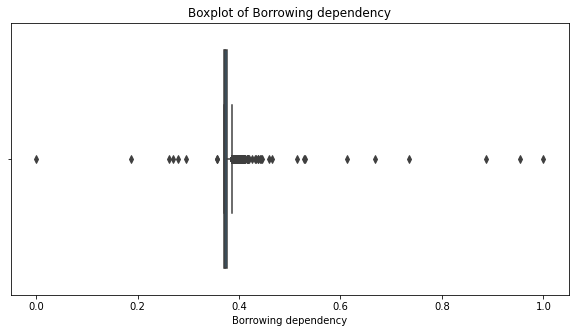

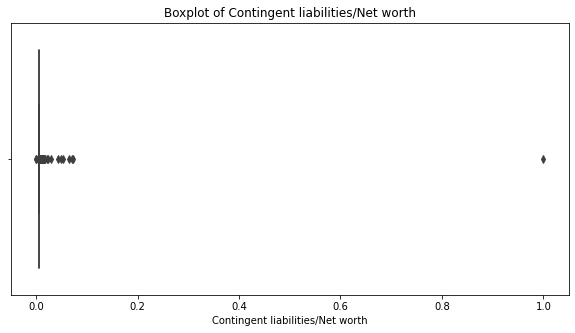

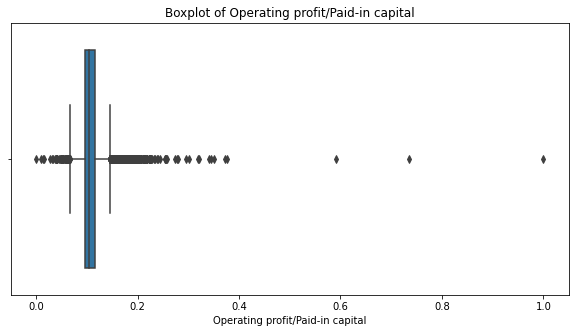

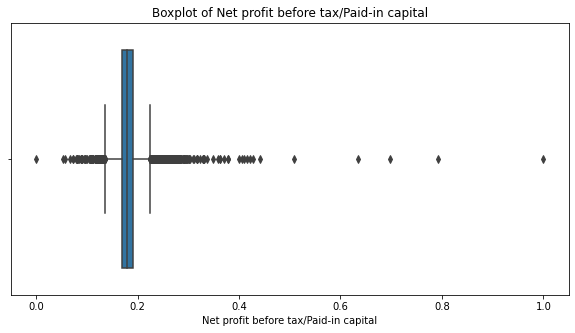

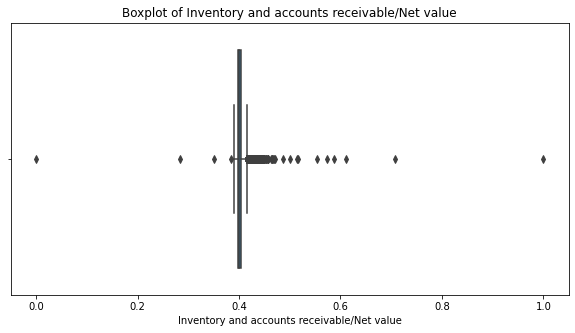

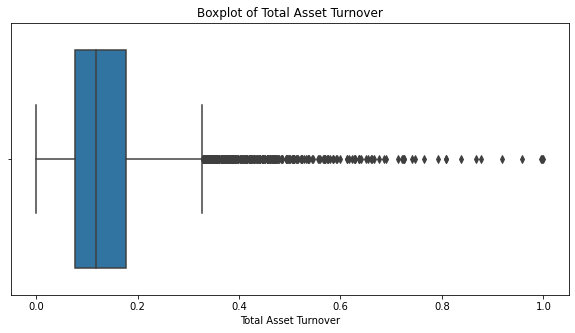

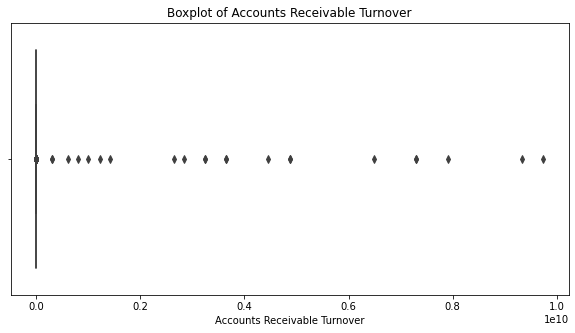

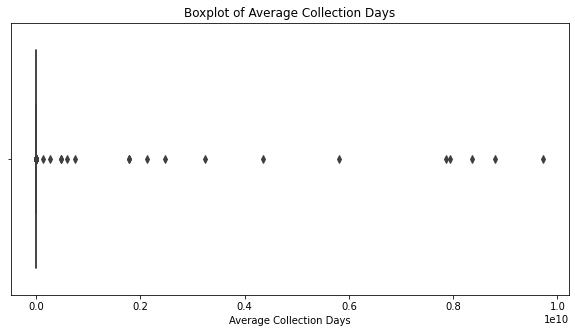

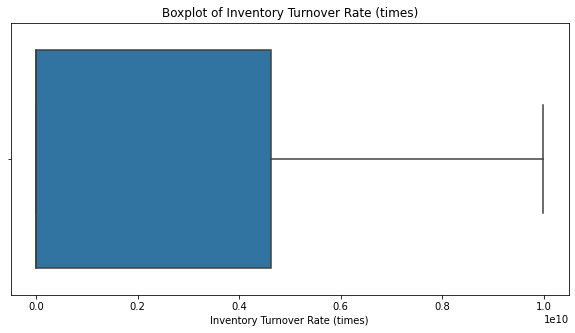

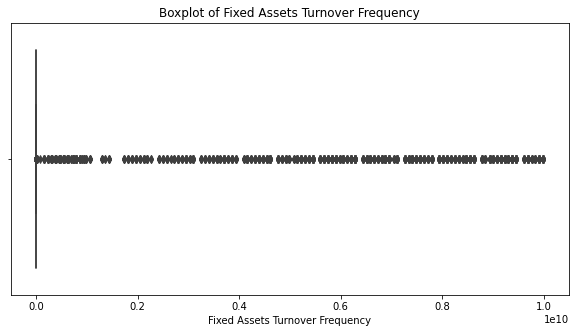

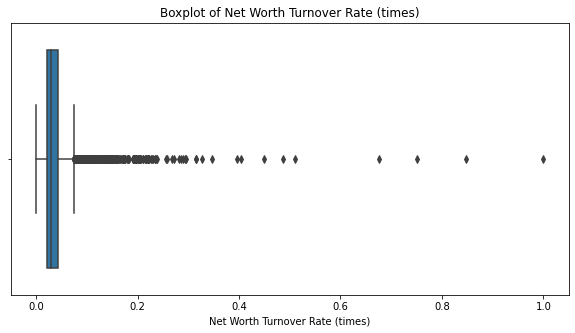

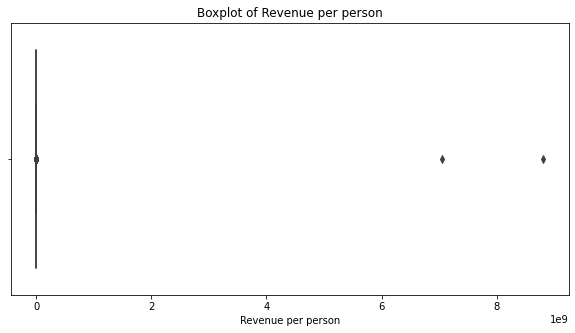

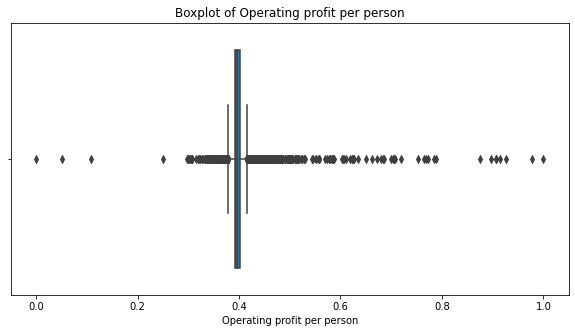

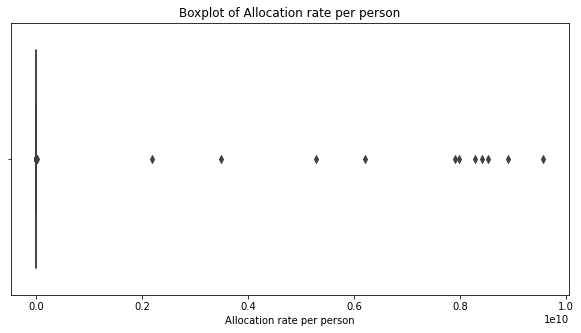

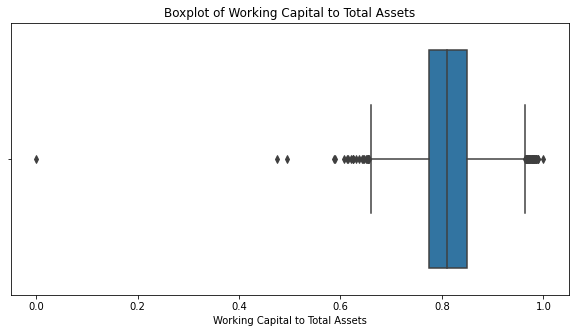

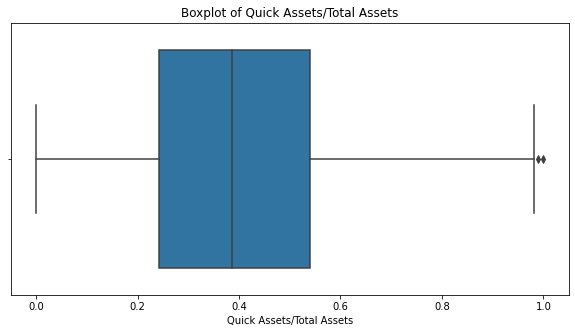

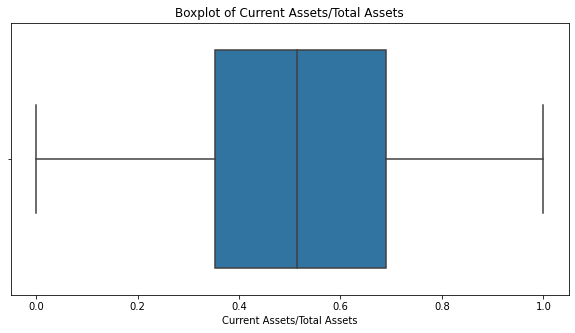

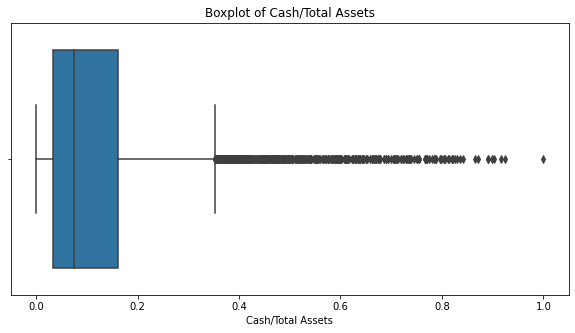

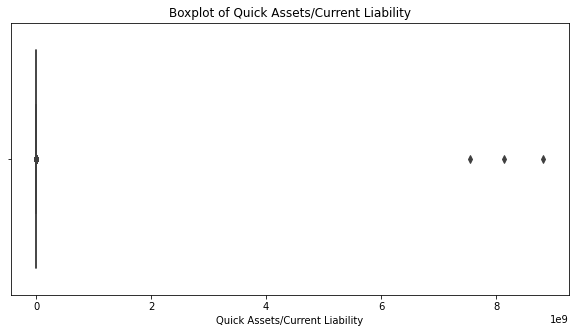

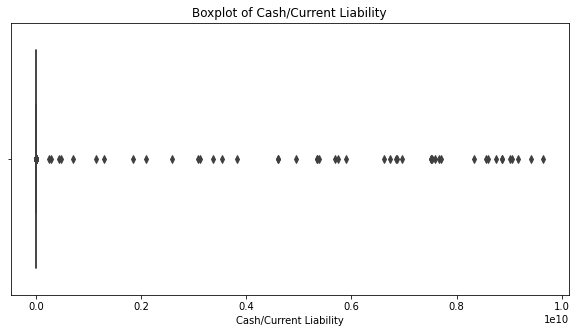

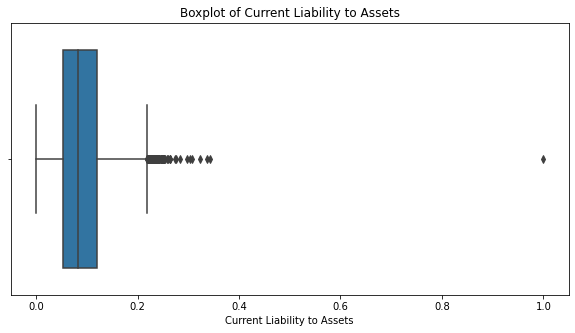

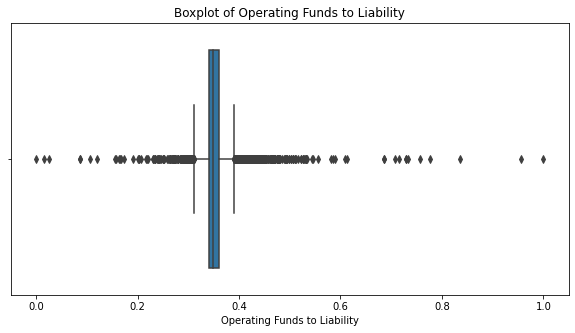

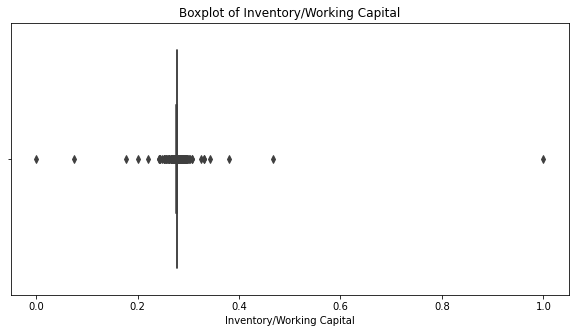

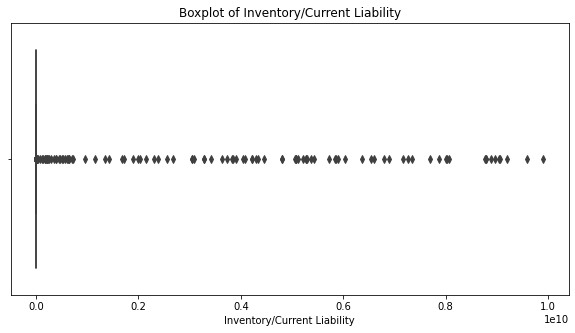

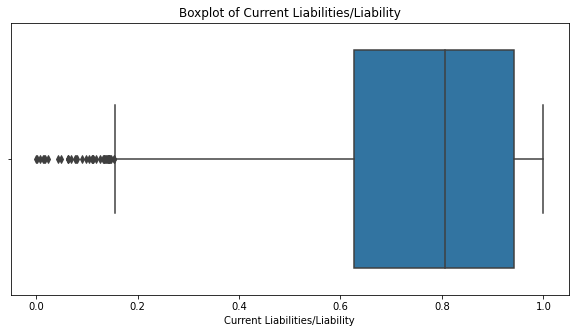

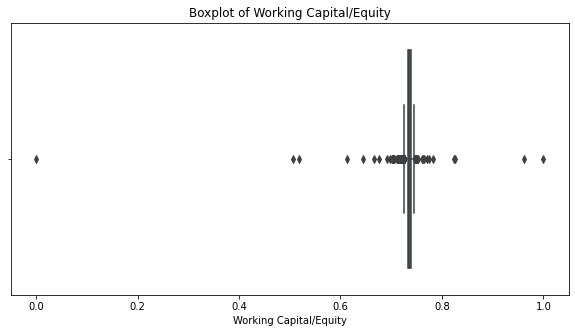

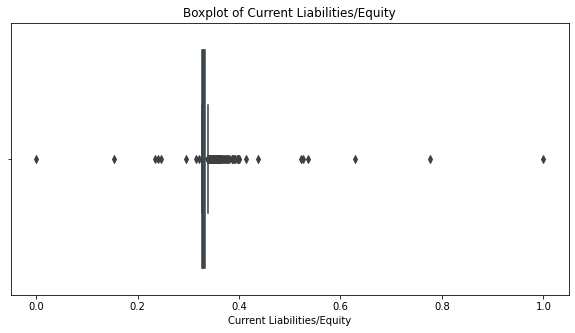

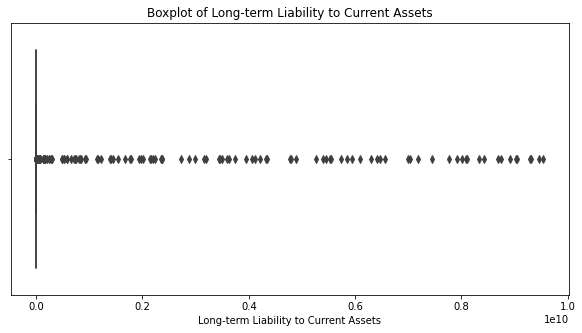

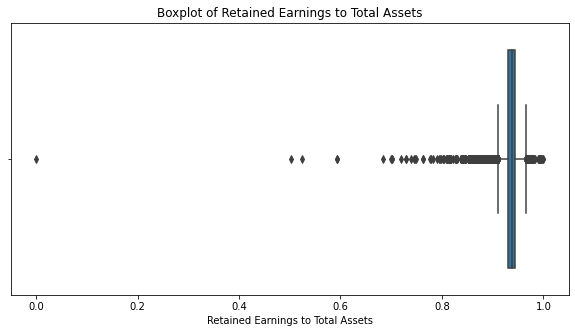

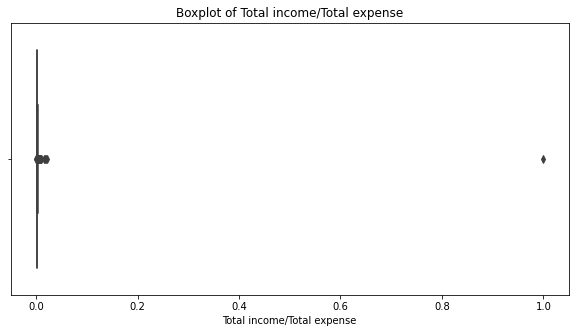

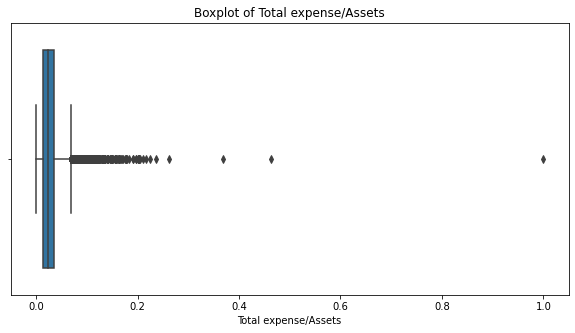

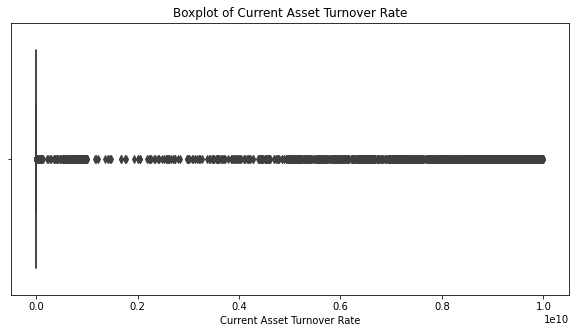

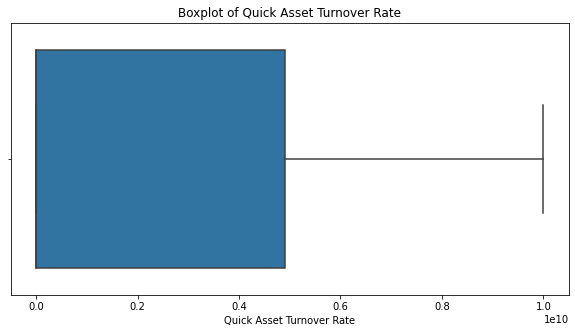

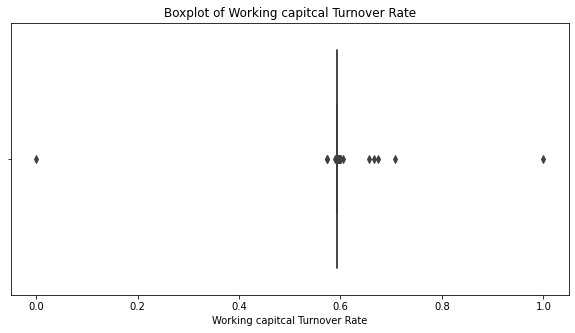

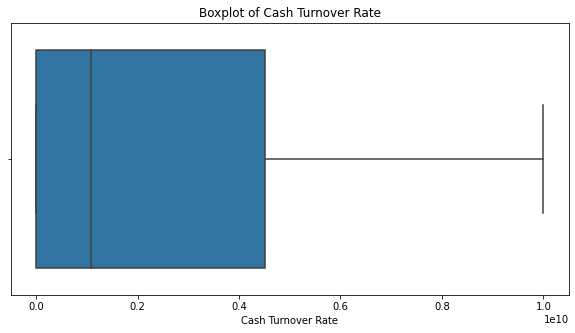

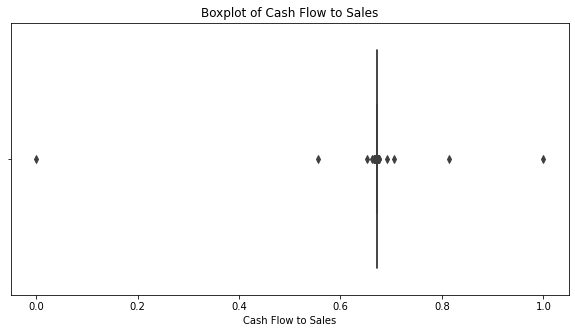

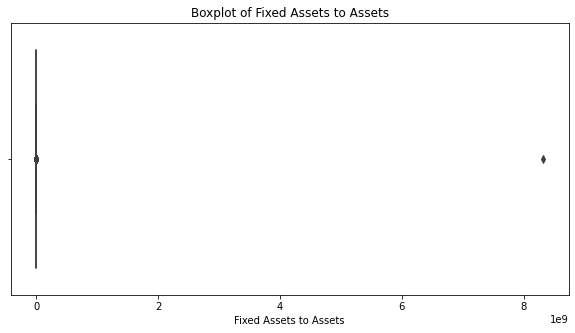

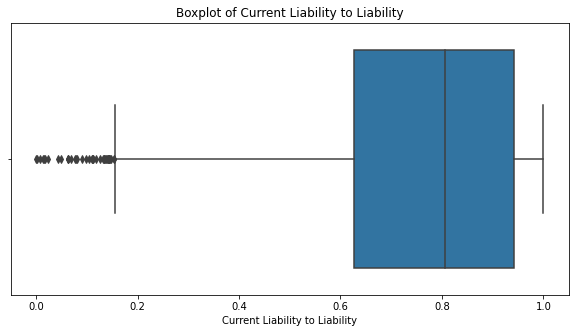

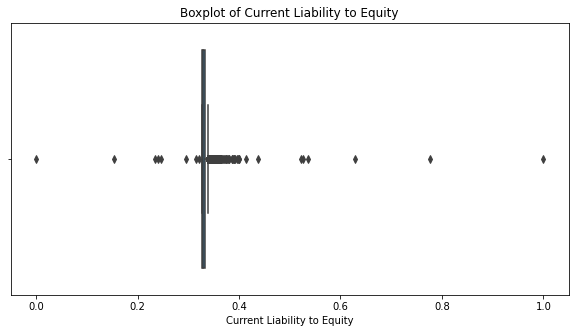

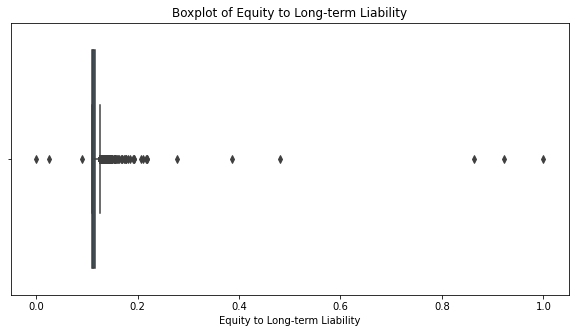

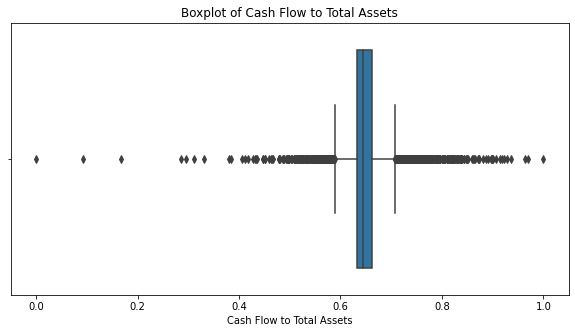

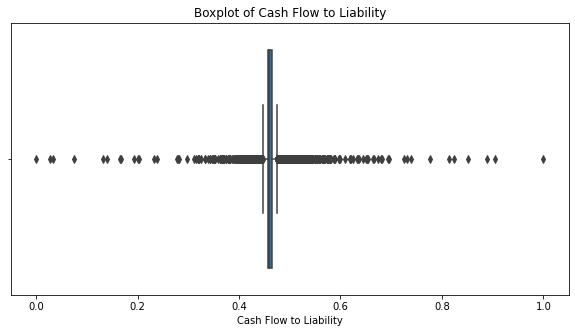

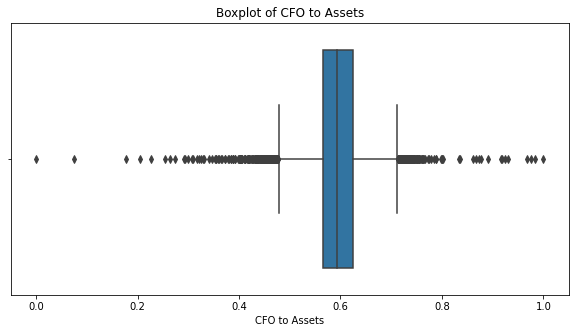

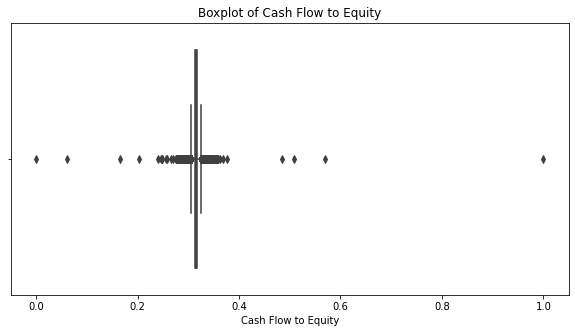

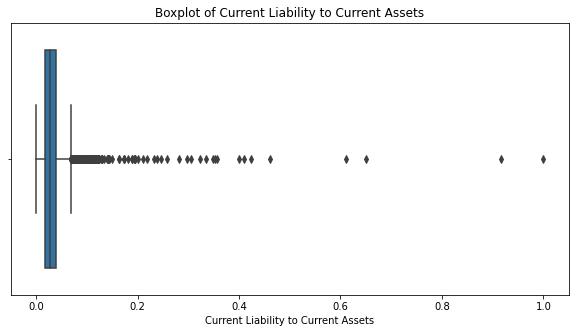

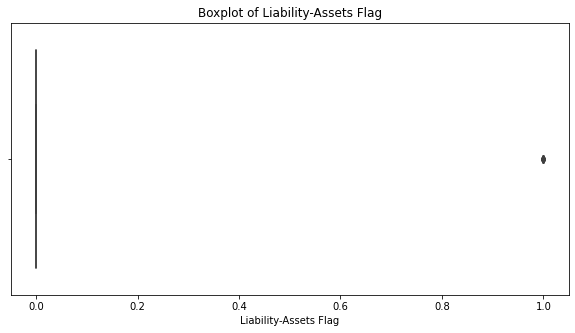

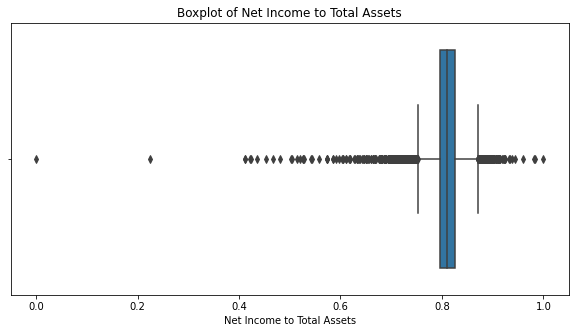

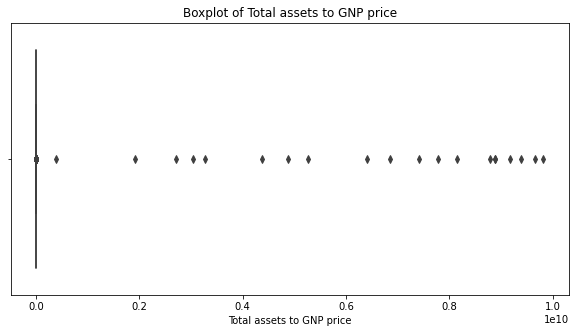

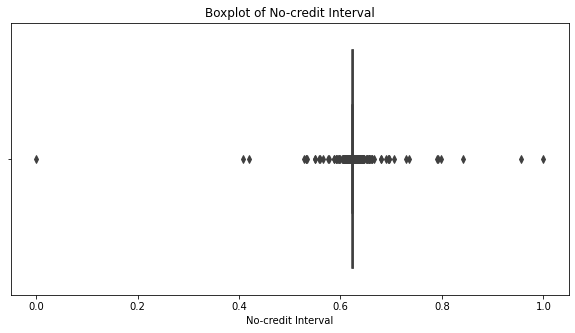

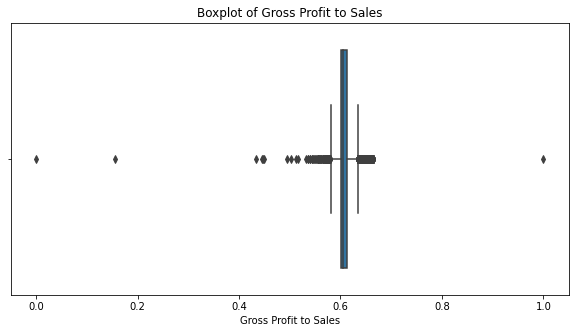

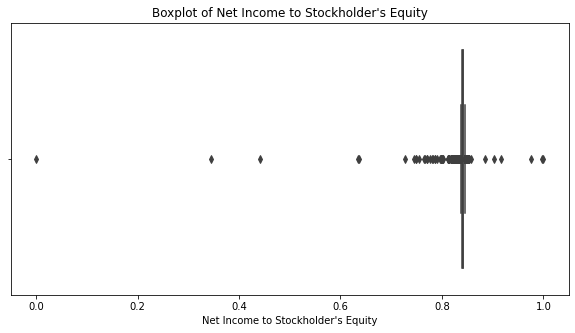

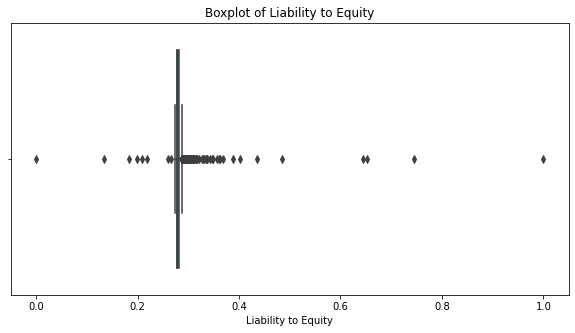

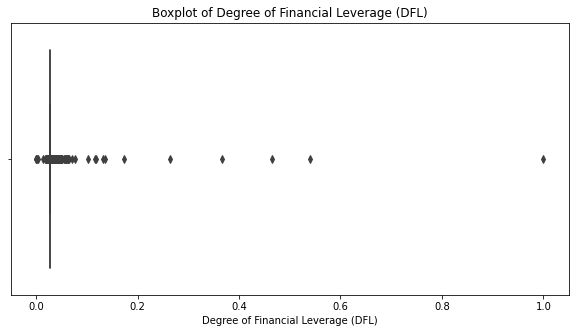

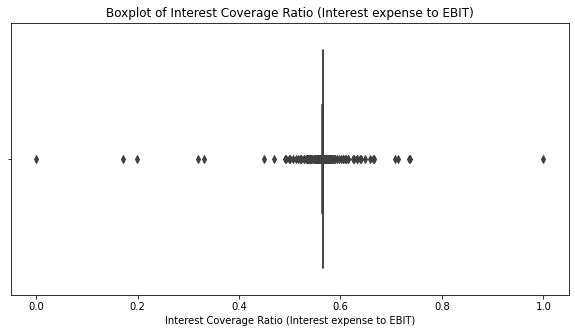

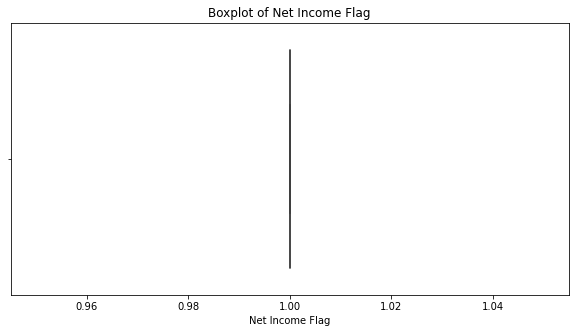

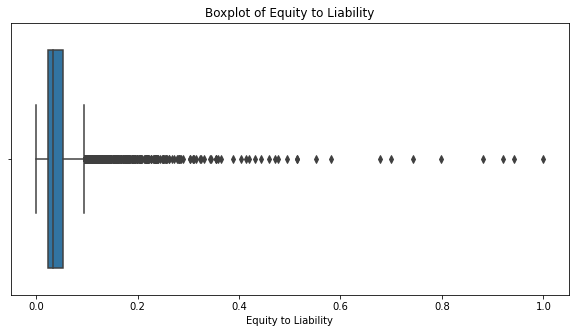

In [9]:
# Boxplot for each feature to detect outliers
for column in df.columns:
    if column != 'Bankrupt?':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

# Handling outliers and imputing them with upper and lower bound

In [10]:
# List of columns to impute (excluding 'Bankrupt?', 'Current Liability to Current Assets', 'Net Income Flag')
columns_to_impute = df.columns.difference(['Bankrupt?', 'Current Liability to Current Assets','Liability-Assests Flag', 'Net Income Flag'])

# Apply the imputation process to each column
for column in columns_to_impute:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with bounds
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

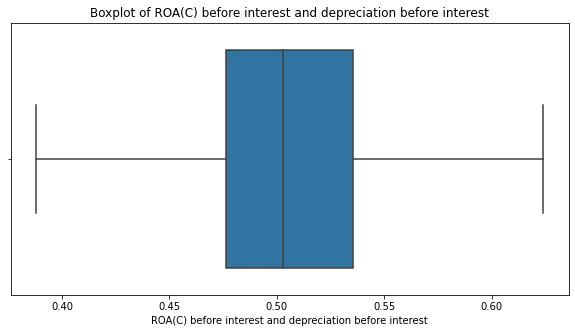

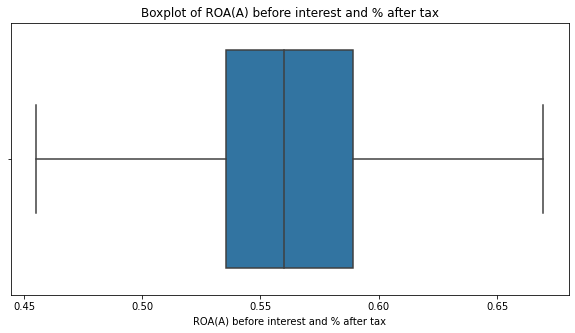

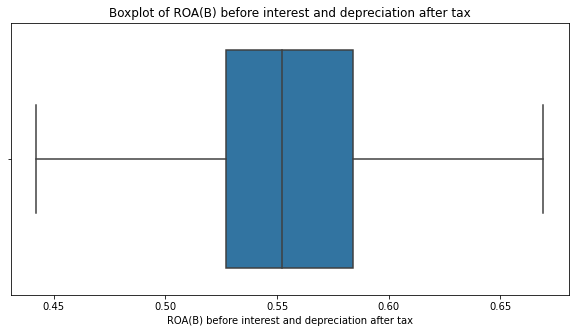

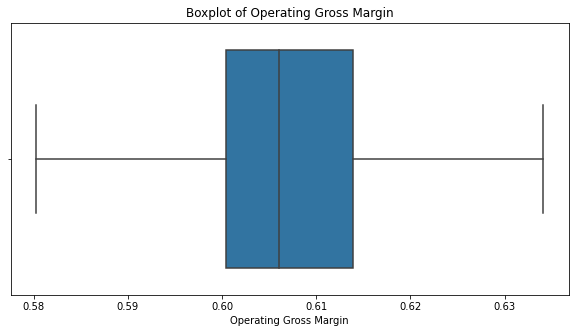

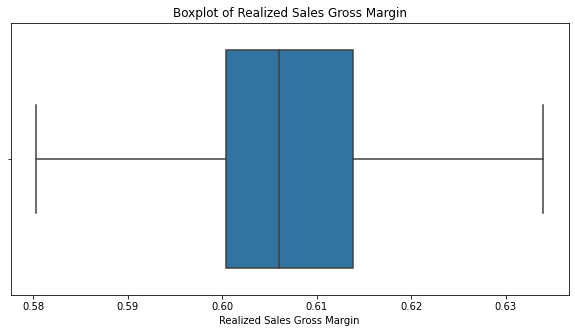

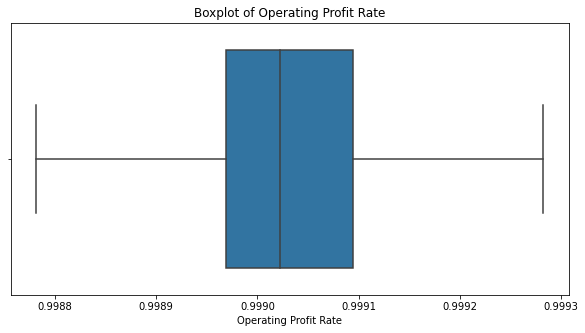

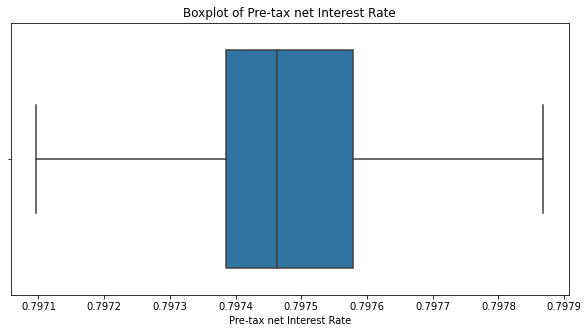

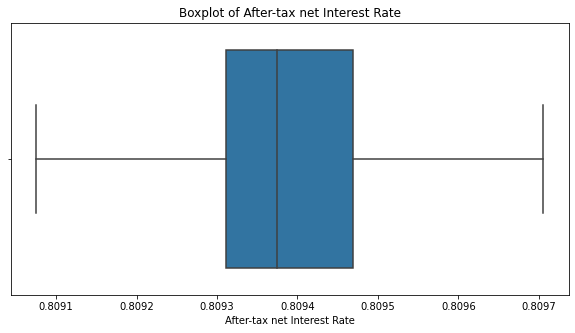

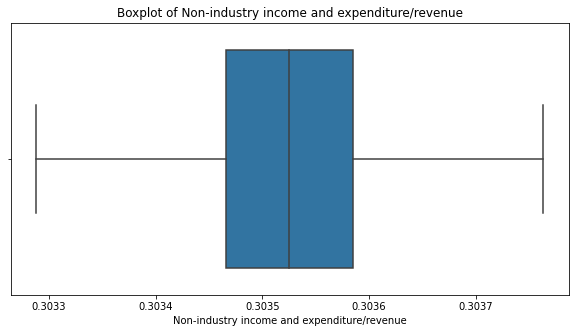

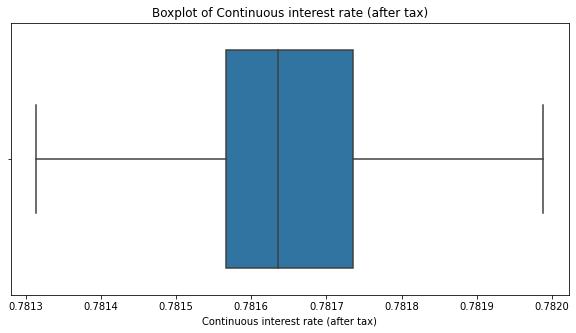

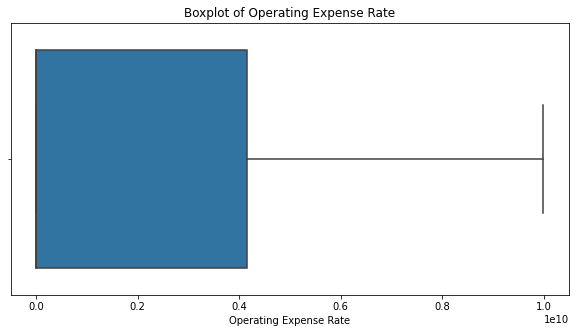

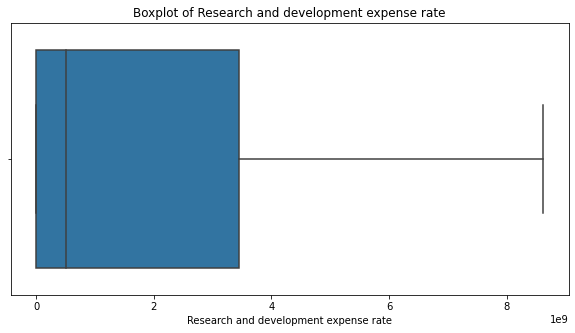

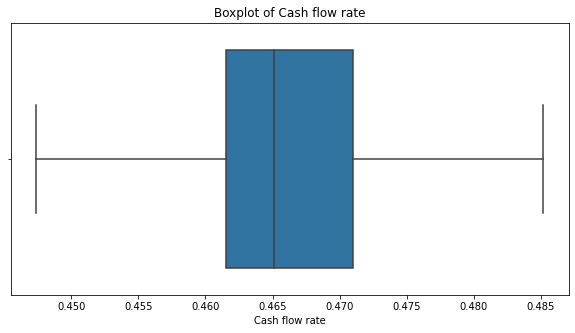

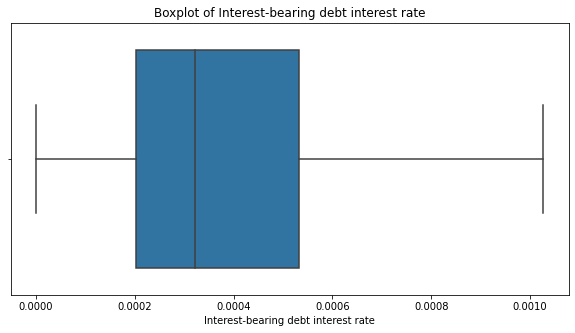

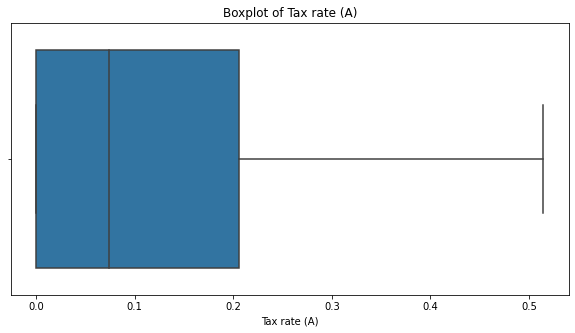

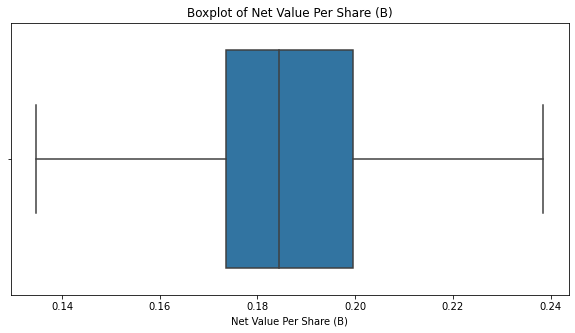

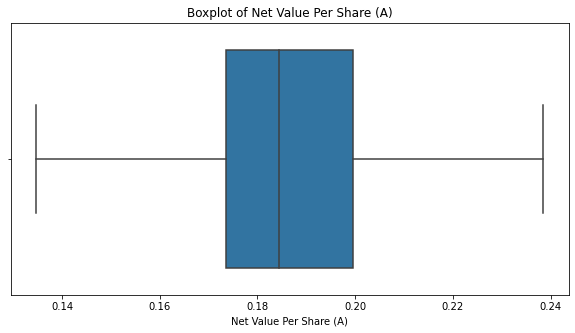

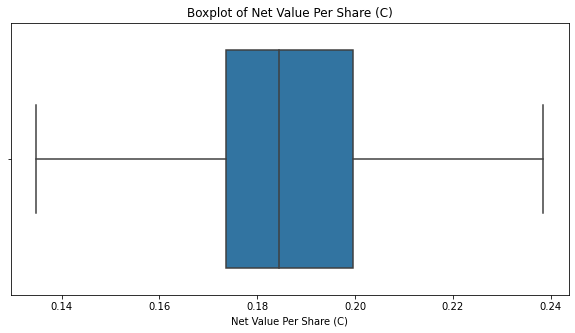

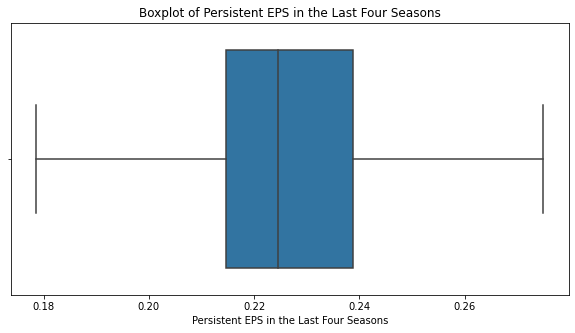

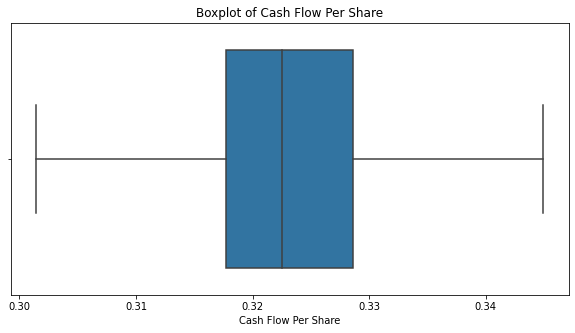

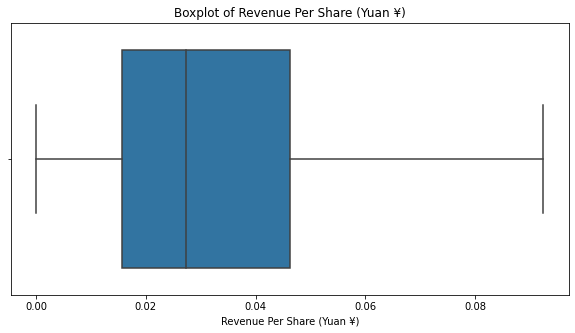

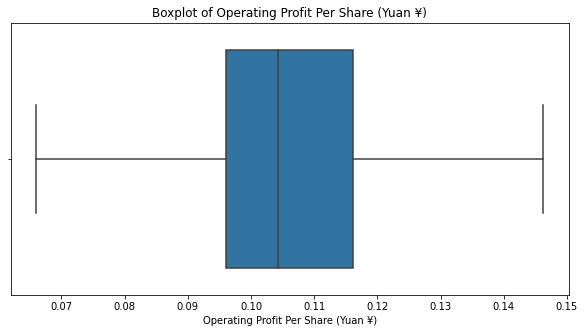

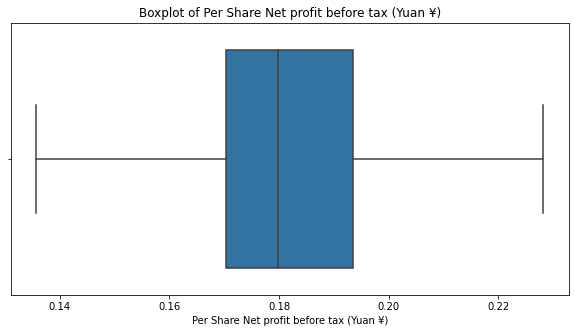

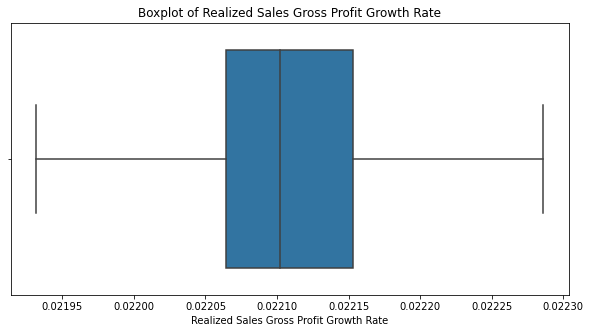

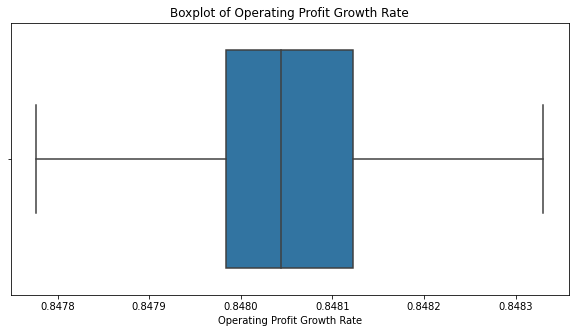

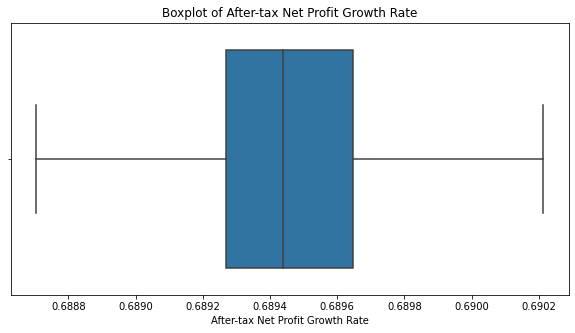

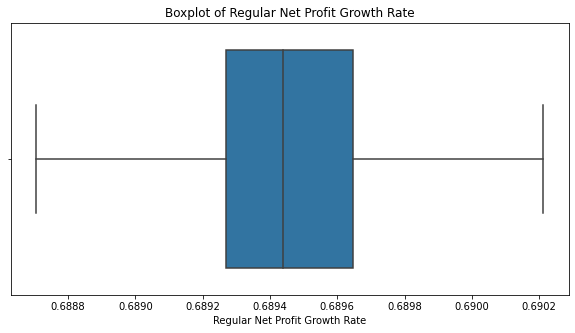

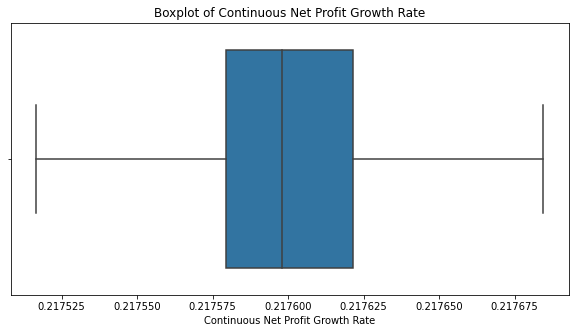

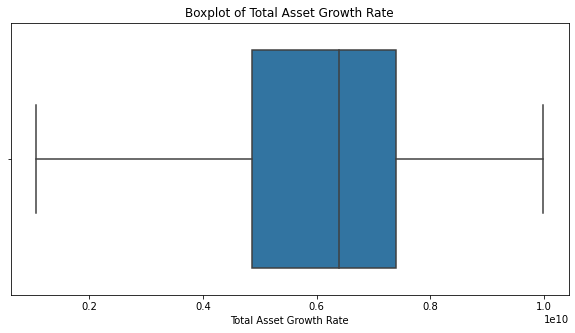

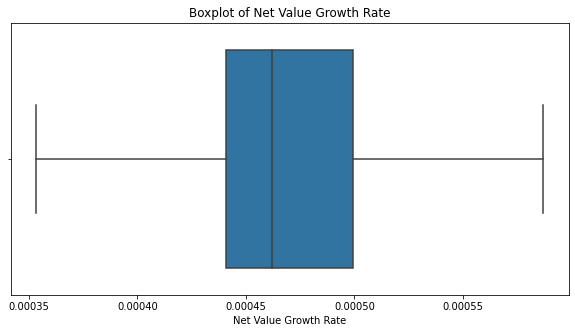

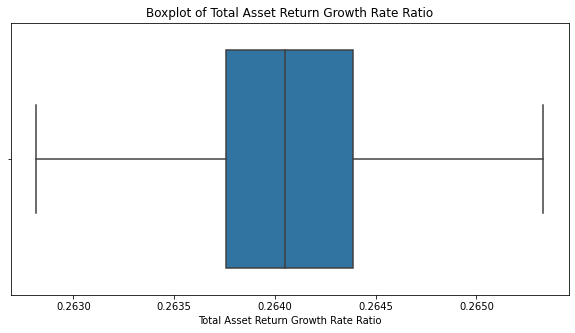

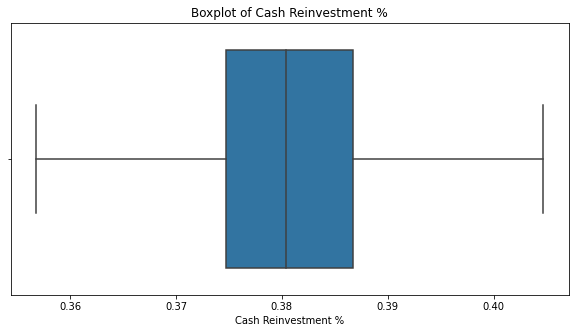

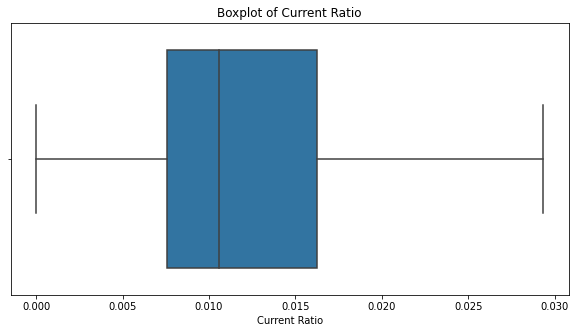

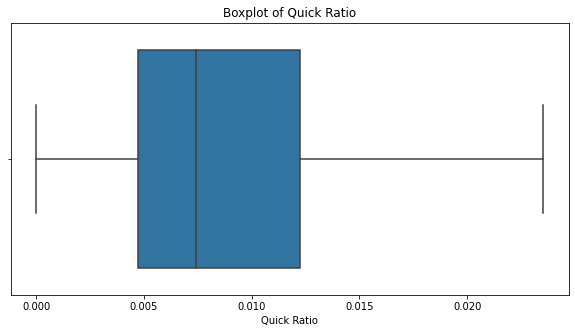

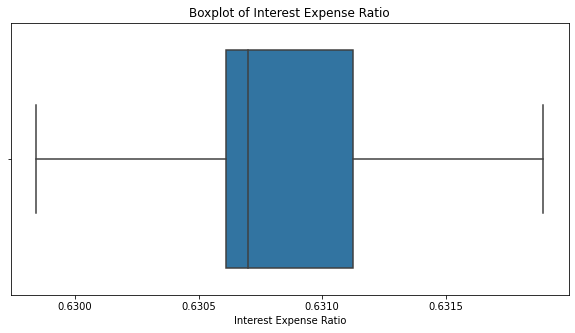

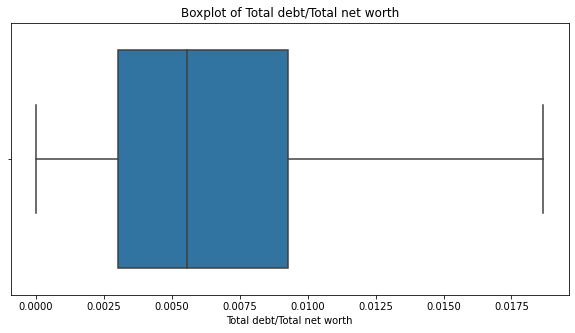

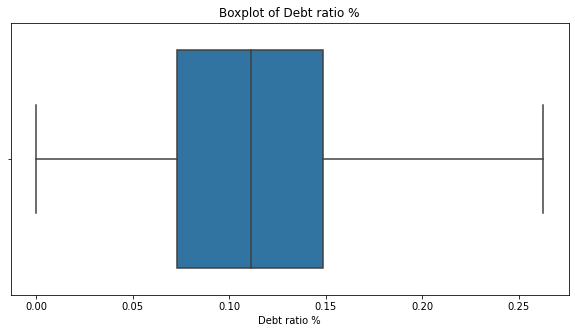

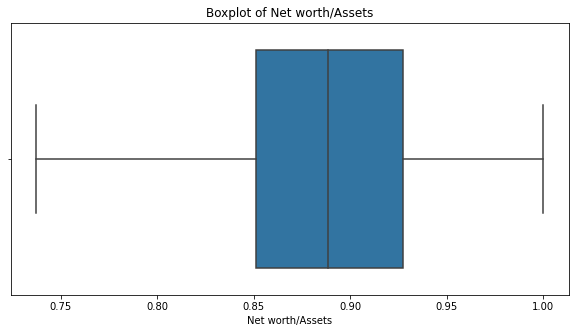

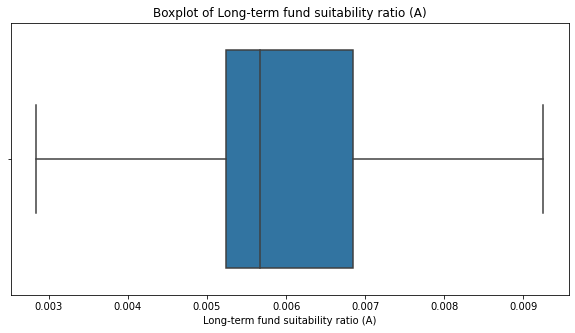

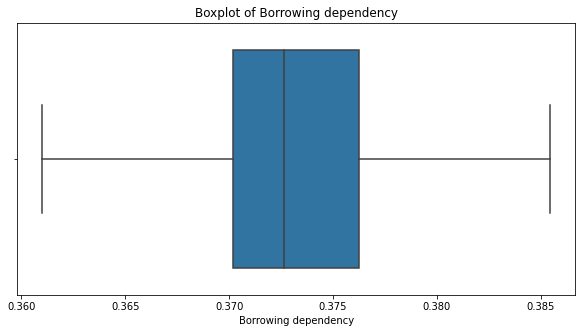

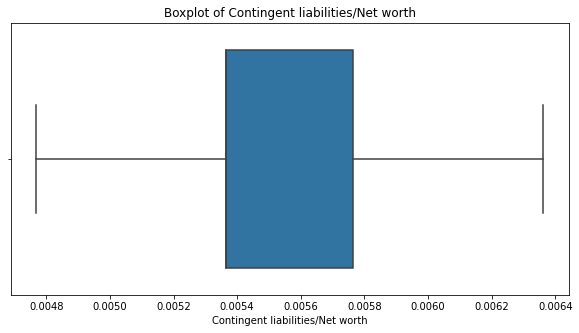

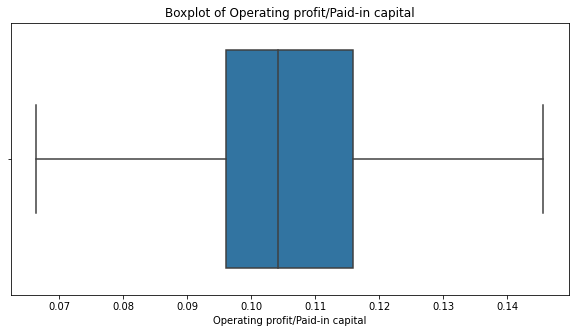

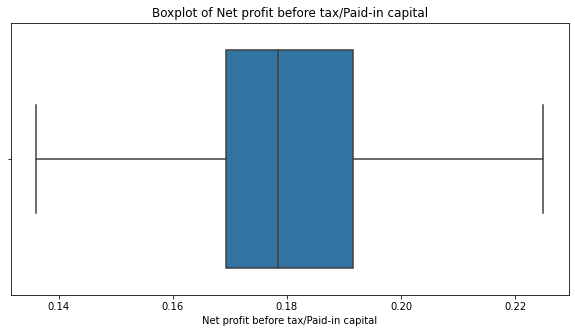

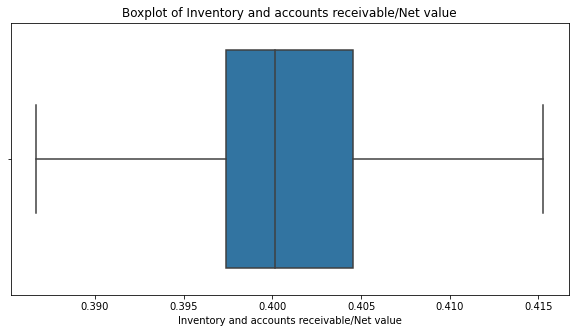

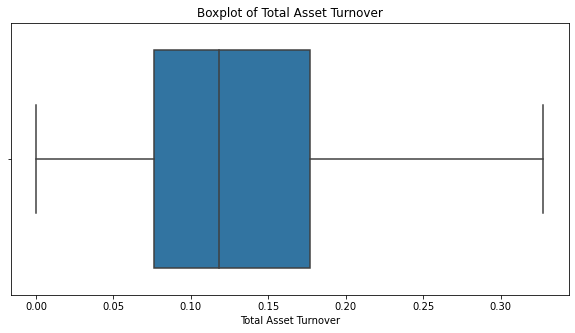

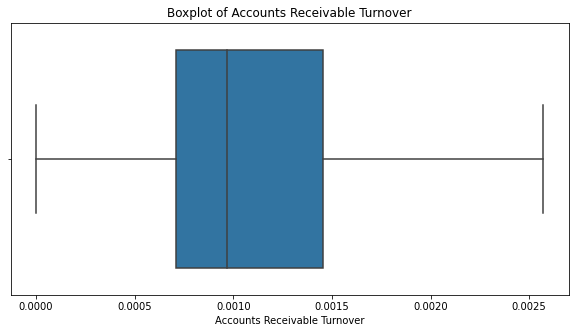

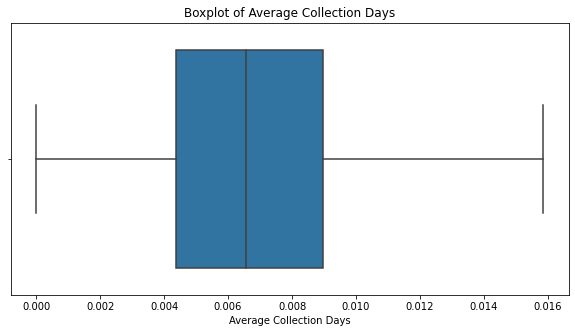

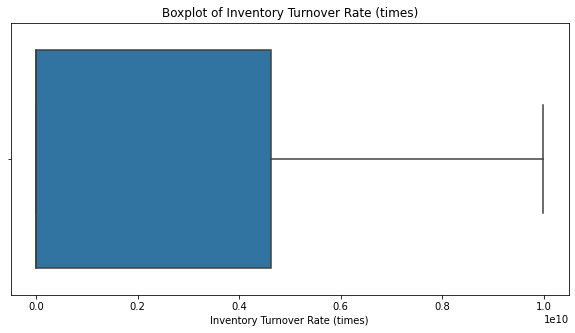

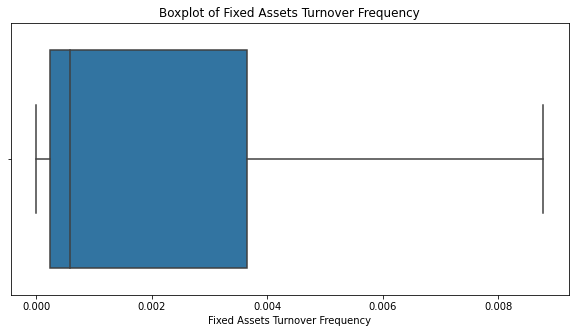

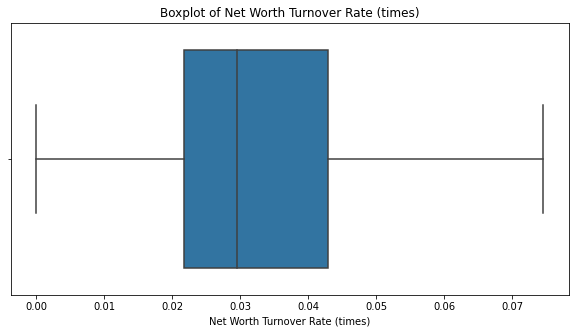

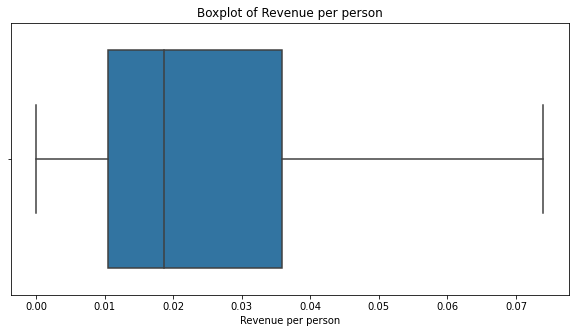

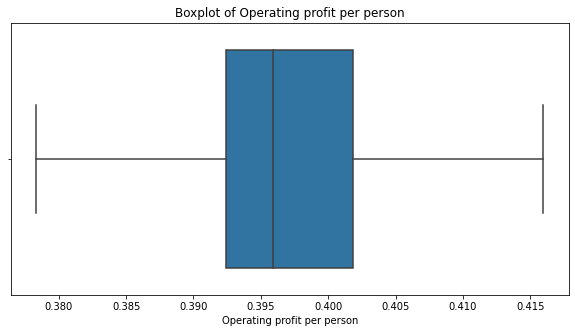

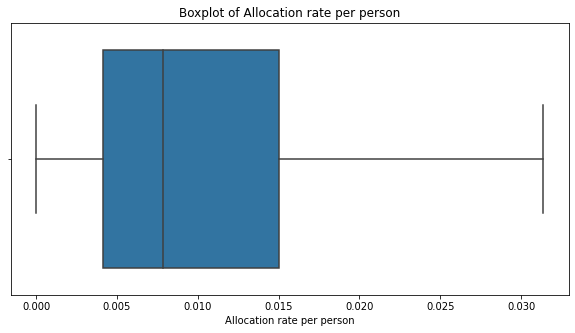

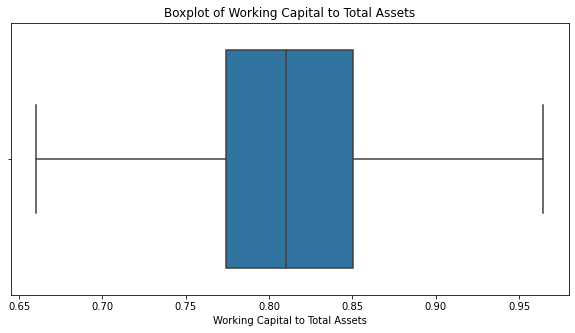

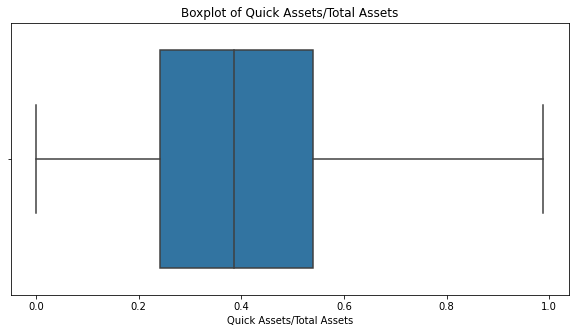

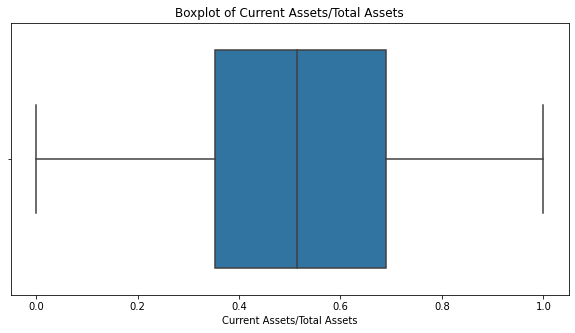

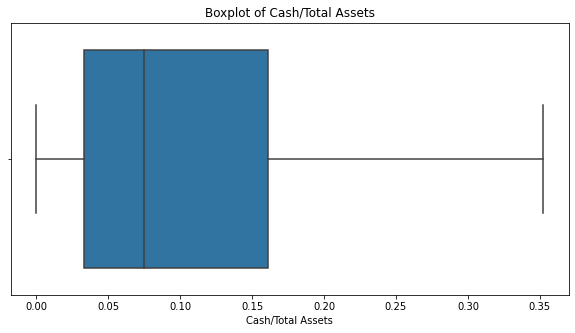

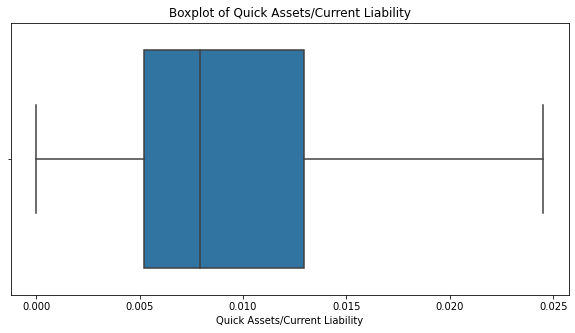

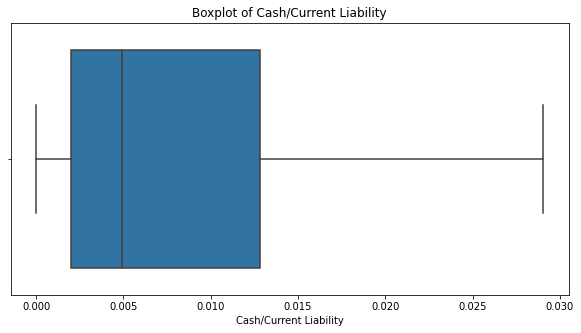

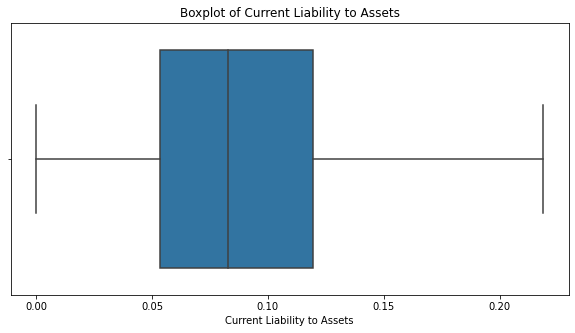

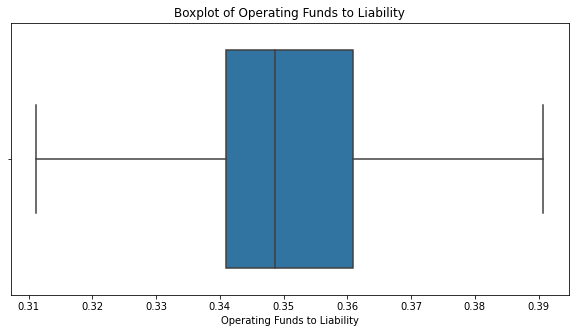

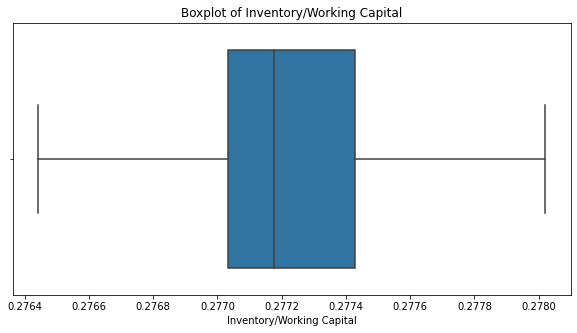

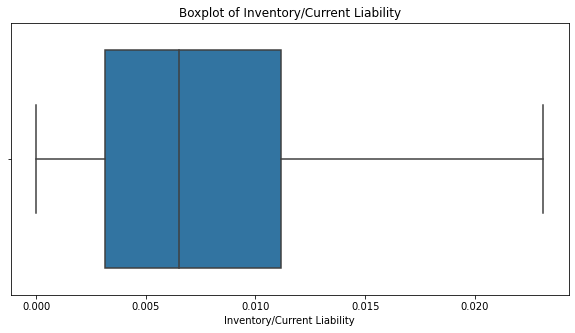

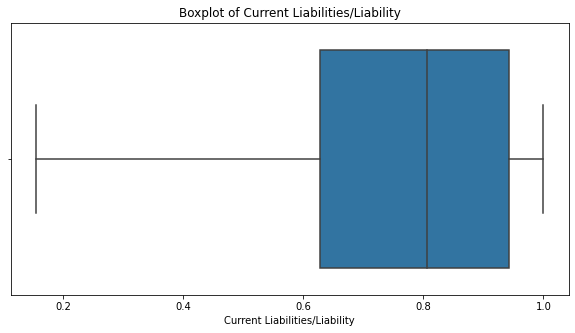

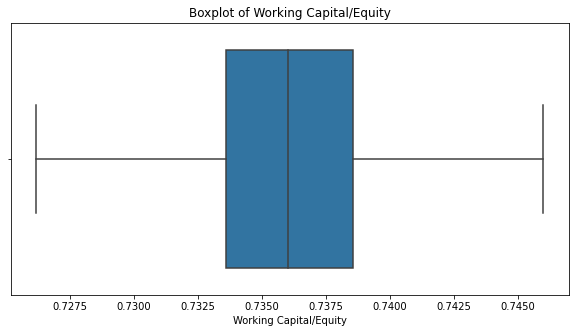

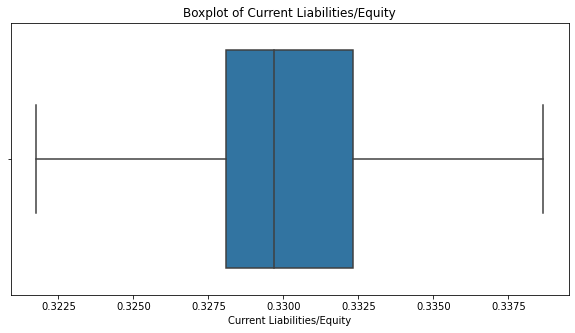

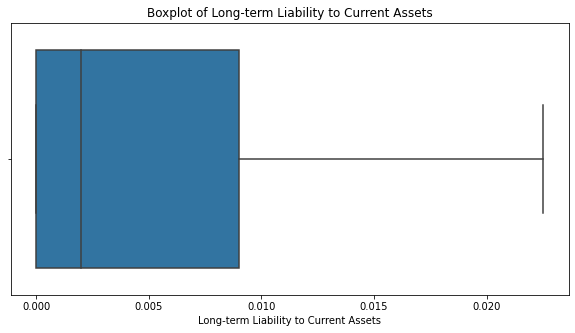

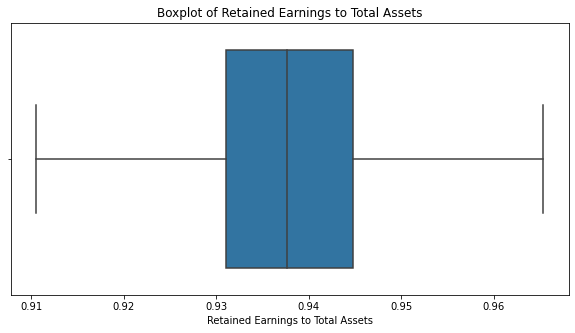

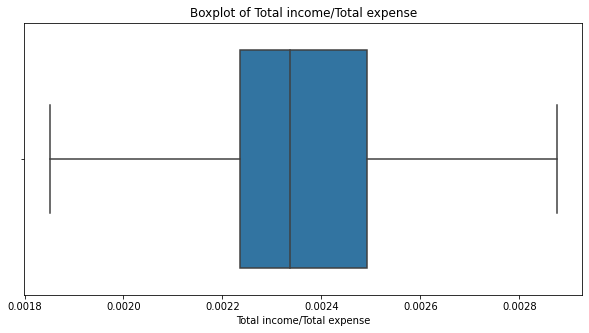

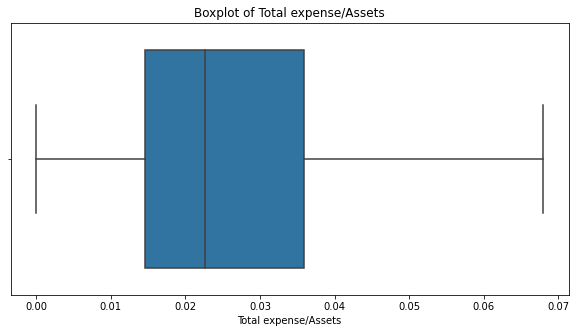

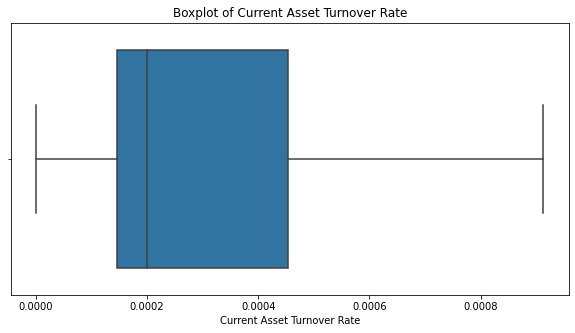

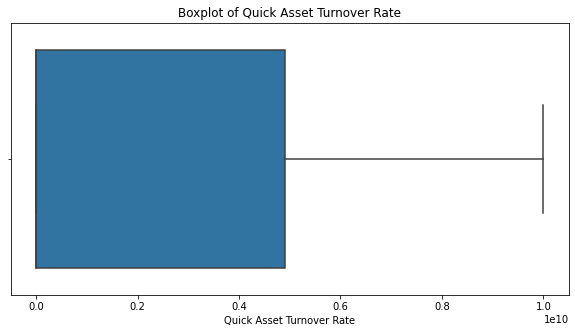

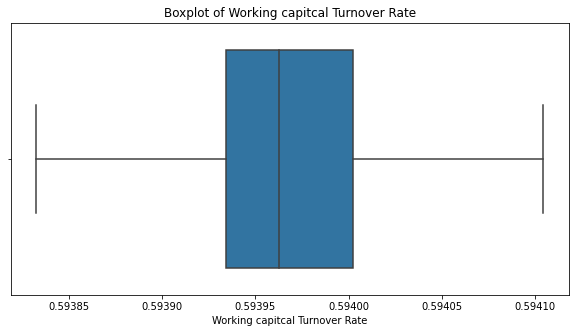

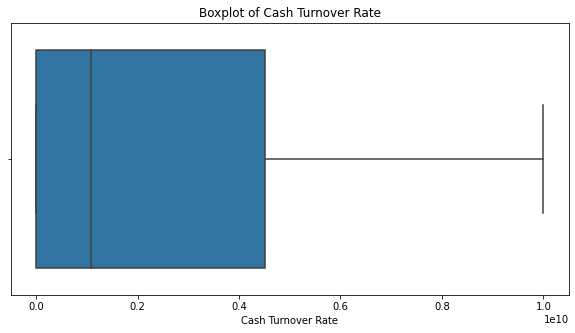

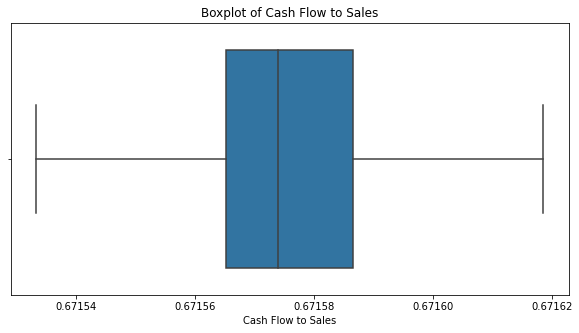

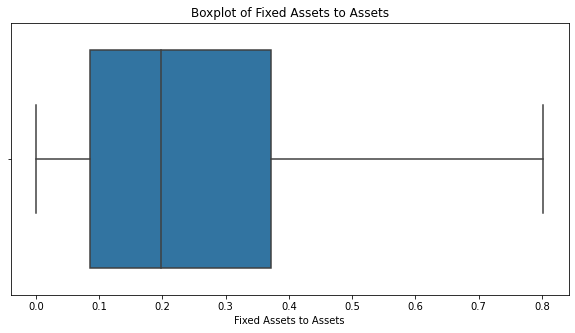

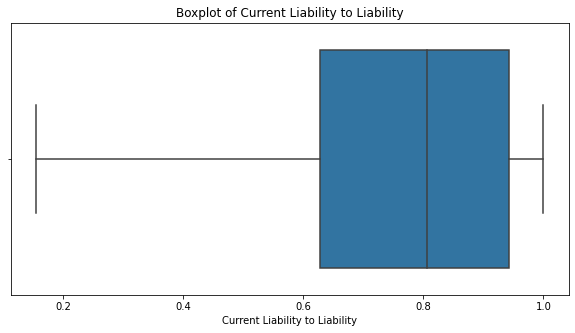

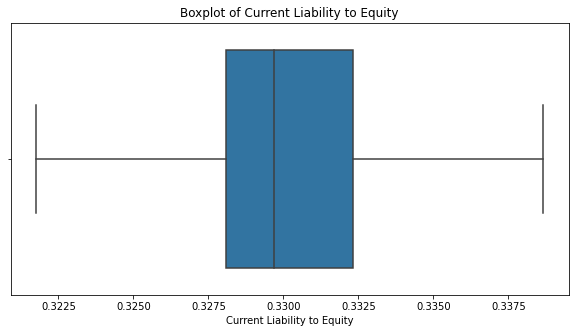

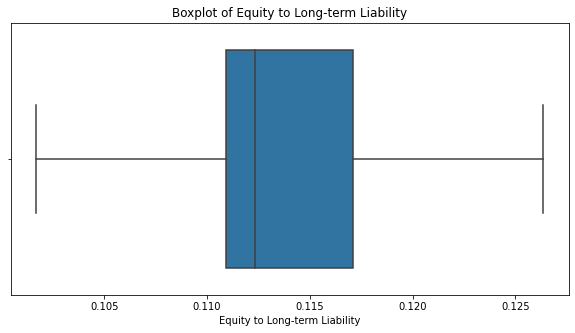

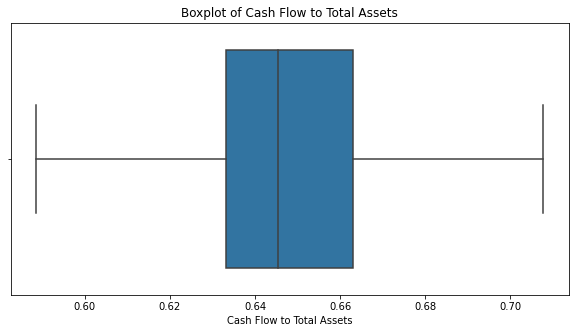

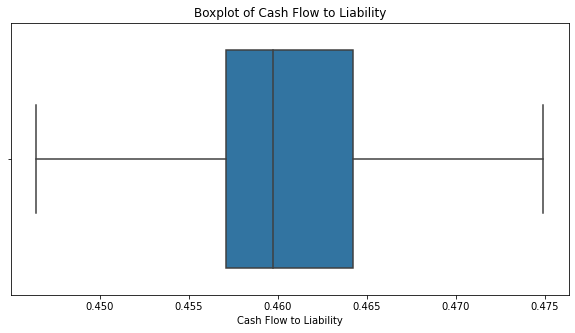

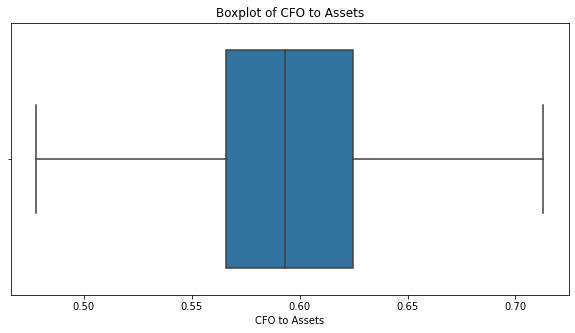

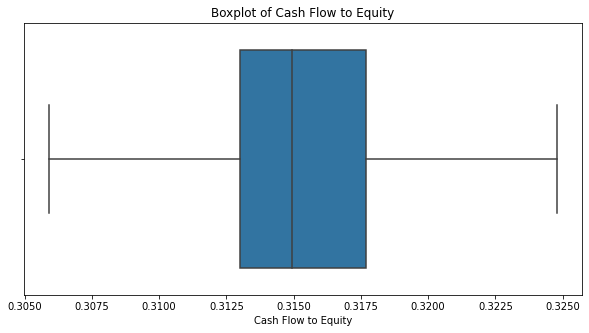

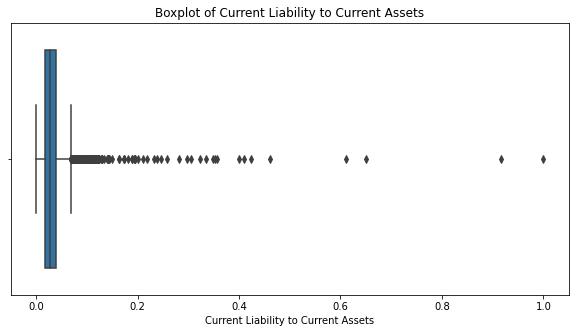

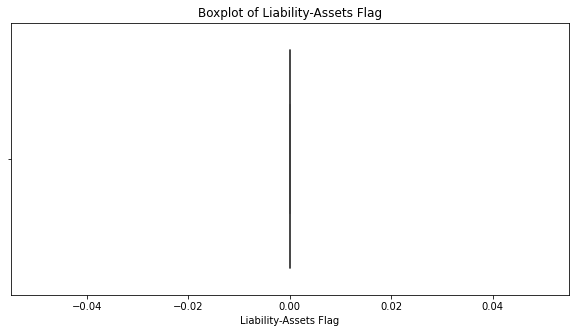

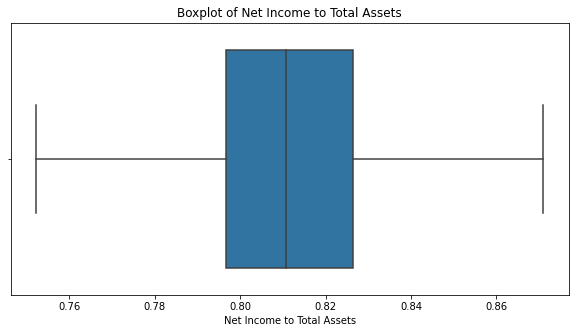

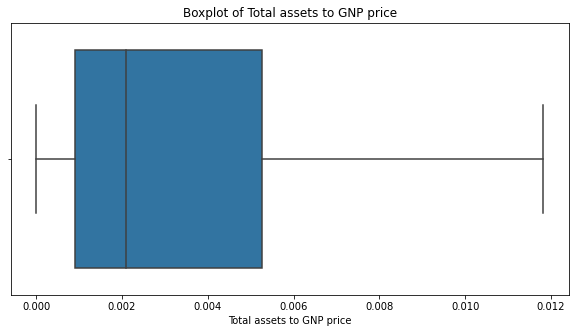

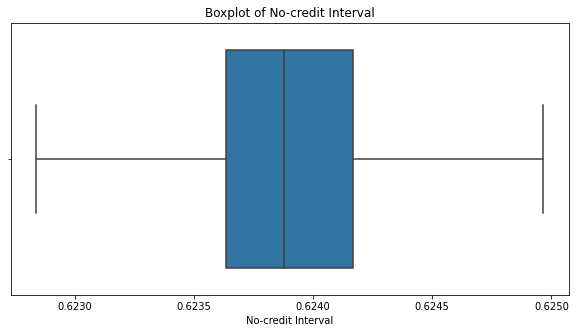

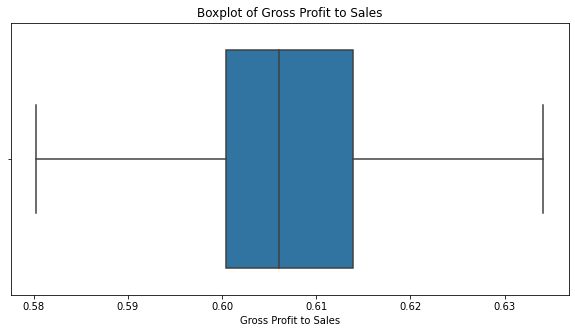

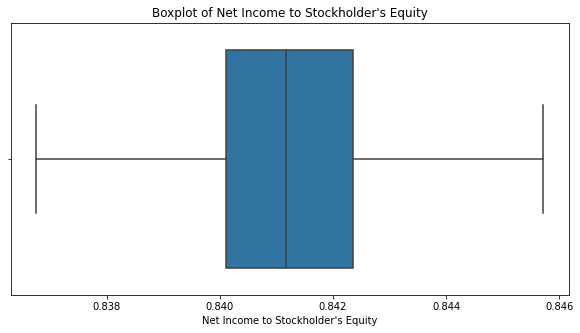

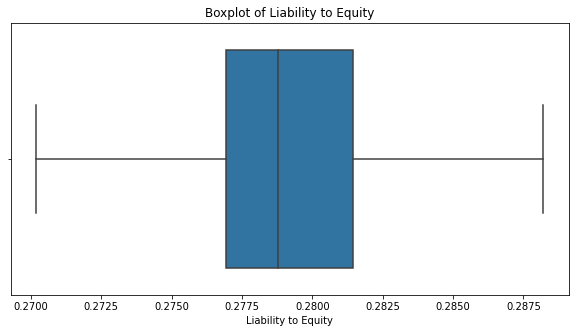

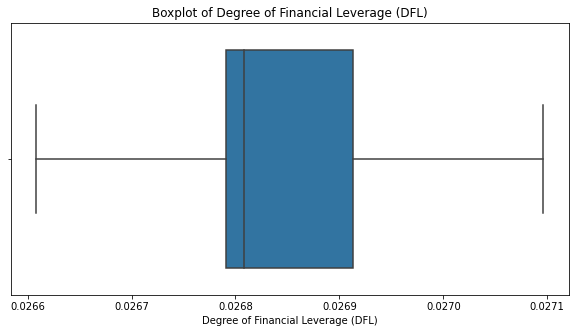

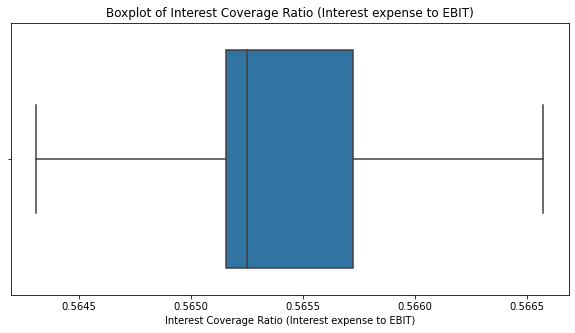

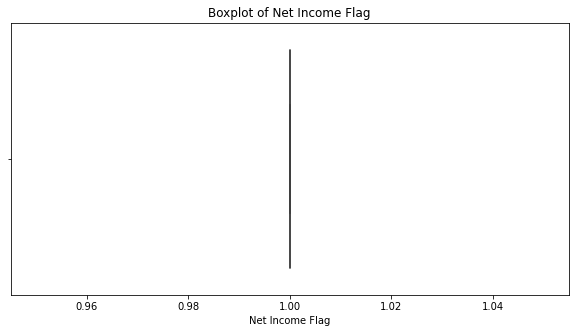

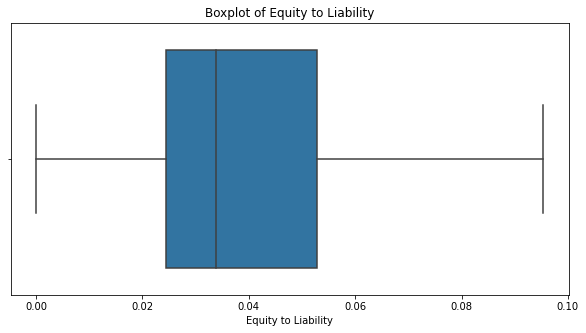

In [11]:
# Boxplot for each feature to detect outliers
for column in df.columns:
    if column != 'Bankrupt?':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

# Finding the correlation of columns with respect to target variable

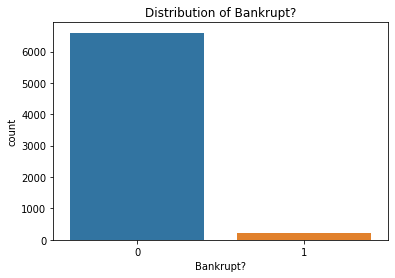

In [12]:
# Distribution of the target variable
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt?')
plt.show()

In [13]:
# Calculate the correlation
correlation_matrix = df.corr()

In [14]:
# Extract the correlation of each feature with the target variable
target_correlation = correlation_matrix['Bankrupt?'].sort_values(ascending=False)

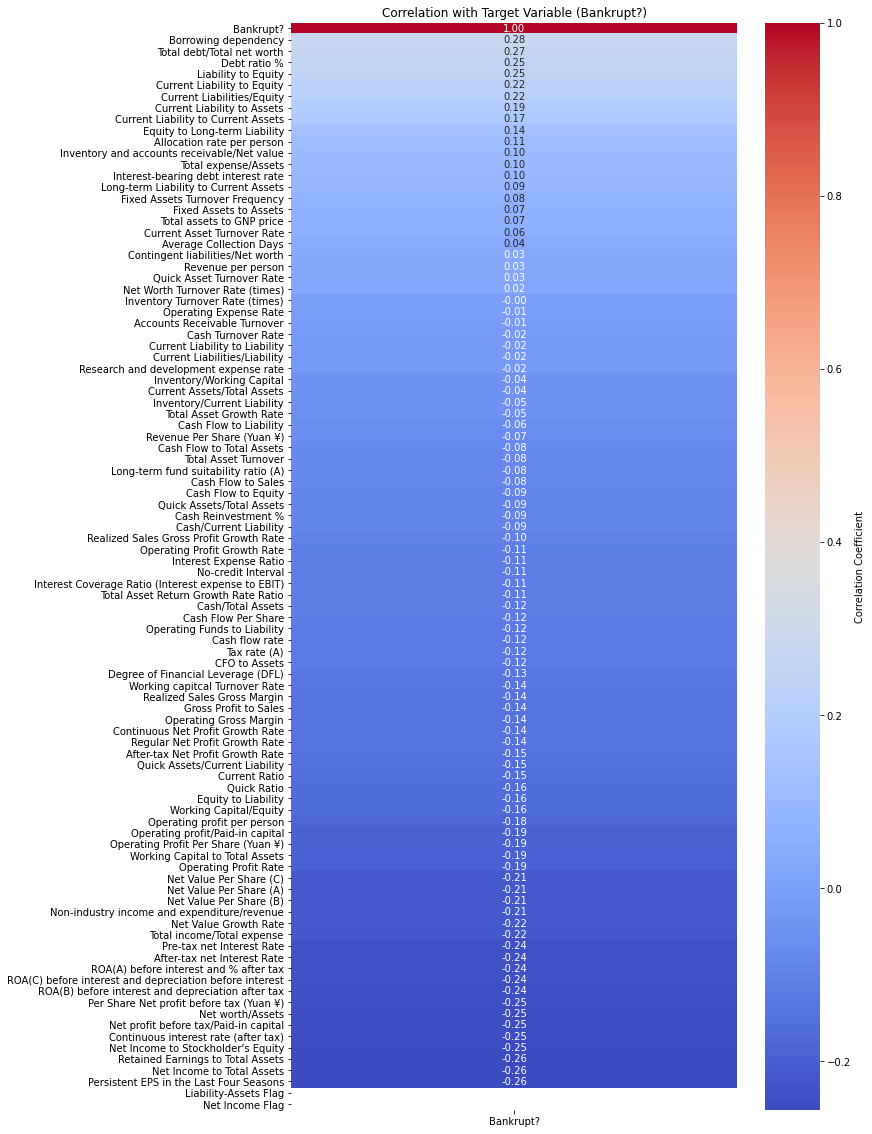

In [15]:
# Plot the correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Bankrupt?)')
plt.show()

# Observations:
# 1. The debt ratio percentage has the highest positive correlation coefficient with the bankrupt column. This means that as the debt ratio increases, the chances of going bankrupt also increase.

# 2. Net income to total assets has the highest negative correlation coefficient with the bankrupt column. This means that as net income to total assets decreases, the chances of going bankrupt also increase.

In [16]:
target_correlation = correlation_matrix['Bankrupt?']
(target_correlation).sort_values(ascending=False) #printing correlation of each column with target column 'Bankrupt? '

Bankrupt?                                                  1.000000
Borrowing dependency                                       0.278367
Total debt/Total net worth                                 0.272914
Debt ratio %                                               0.246535
Liability to Equity                                        0.246176
Current Liability to Equity                                0.216619
Current Liabilities/Equity                                 0.216619
Current Liability to Assets                                0.193564
Current Liability to Current Assets                        0.171306
Equity to Long-term Liability                              0.140383
Allocation rate per person                                 0.113516
Inventory and accounts receivable/Net value                0.104791
Total expense/Assets                                       0.102058
Interest-bearing debt interest rate                        0.097928
Long-term Liability to Current Assets           

# Find Insights through Data Visualization

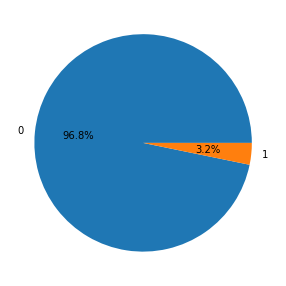

In [17]:
bankrupt_counts = df['Bankrupt?'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(bankrupt_counts, labels=bankrupt_counts.index, autopct='%1.1f%%')
plt.show()

# Observation:
# 1. This shows that only 3.2 companies are bankrupt and 96.80 is non-bankrupt

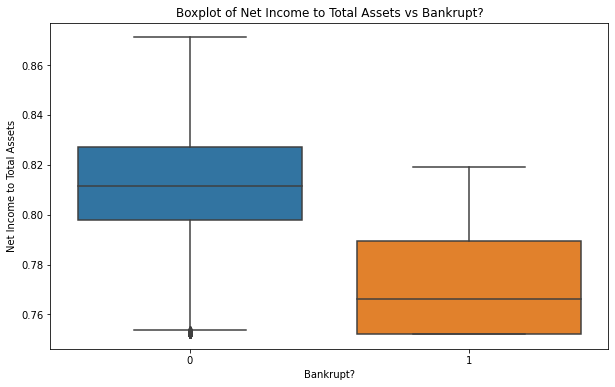

In [18]:
# Example dataframe (replace with your actual dataframe)
# Assuming df contains your data with 'Bankrupt?' as the target variable

plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='Net Income to Total Assets', data=df)
plt.title('Boxplot of Net Income to Total Assets vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Net Income to Total Assets')
plt.show()

# Observations:
# 50% of the values of Net Income to Total Assets for bankruptcy = 1 lie in the range of 0.75 to 0.79.

# 50% of the values of Net Income to Total Assets for bankruptcy = 0 lie in the range of 0.80 to 0.83.

# The chances of bankruptcy are higher for lower Net Income to Total Assets values. If the value of Net Income to Total Assets goes below 0.79, the chances of going bankrupt are higher.

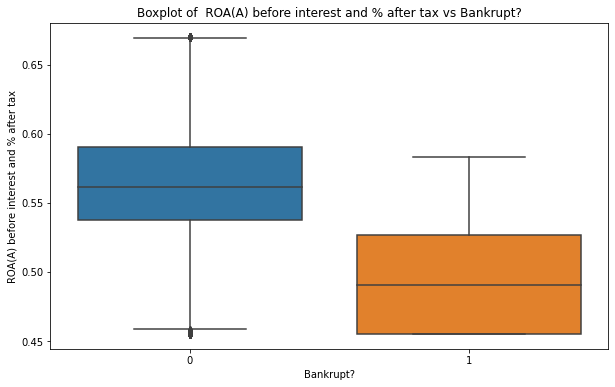

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='ROA(A) before interest and % after tax', data=df)
plt.title('Boxplot of  ROA(A) before interest and % after tax vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('ROA(A) before interest and % after tax')
plt.show()

# Observations:
# 50% of the values of ROA(A) before interest and % after tax for bankruptcy = 1 lie in the range of 0.46 to 0.53.

# 50% of the values of ROA(A) before interest and % after tax for bankruptcy = 0 lie in the range of 0.54 to 0.59.

# The chances of bankruptcy are higher for lower values of ROA(A) before interest and % after tax. If the value of ROA(A) before interest and % after tax goes below 0.53, the chances of going bankrupt are higher.

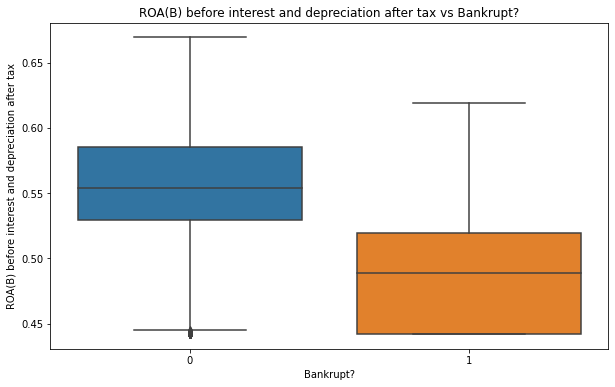

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='ROA(B) before interest and depreciation after tax', data=df)
plt.title('ROA(B) before interest and depreciation after tax vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('ROA(B) before interest and depreciation after tax')
plt.show()

# Observations:
# 50% of the values of ROA(B) before interest and depreciation after tax for bankruptcy = 1 lie in the range of 0.45 to 0.52.

# 50% of the values of ROA(B) before interest and depreciation after tax for bankruptcy = 0 lie in the range of 0.53 to 0.59.

# The chances of bankruptcy are higher for lower values of ROA(B) before interest and depreciation after tax. If the value of ROA(B) before interest and depreciation after tax goes below 0.52, the chances of going bankrupt are higher.

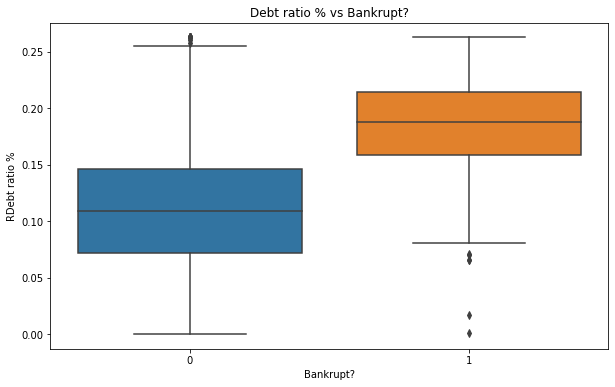

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='Debt ratio %', data=df)
plt.title('Debt ratio % vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('RDebt ratio %')
plt.show()

# Observations:
# 50% of the values of Debt Ratio % for bankruptcy = 1 lie in the range of 0.16 to 0.21.

# 50% of the values of Debt Ratio % for bankruptcy = 0 lie in the range of 0.07 to 0.14.

# The chances of bankruptcy are higher for higher values of Debt Ratio %. If the value of the Debt Ratio % goes above 0.16, the chances of going bankrupt are higher.

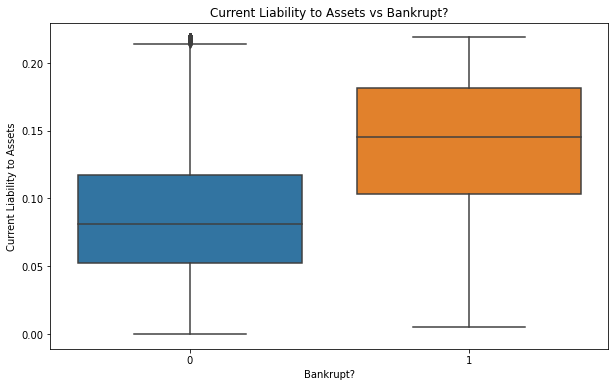

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bankrupt?', y='Current Liability to Assets', data=df)
plt.title('Current Liability to Assets vs Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Current Liability to Assets')
plt.show()

# Observations:
# 50% of the values of Current Liability to Assets for bankruptcy = 1 lie in the range of 0.10 to 0.17.

# 50% of the values of Current Liability to Assets for bankruptcy = 0 lie in the range of 0.05 to 0.11.

# The chances of bankruptcy are higher for higher values of Current Liability to Assets. If the value of Current Liability to Assets goes above 0.11, the chances of going bankrupt are higher. In the range of 0.10 to 0.11, there are values that fall into both categories.

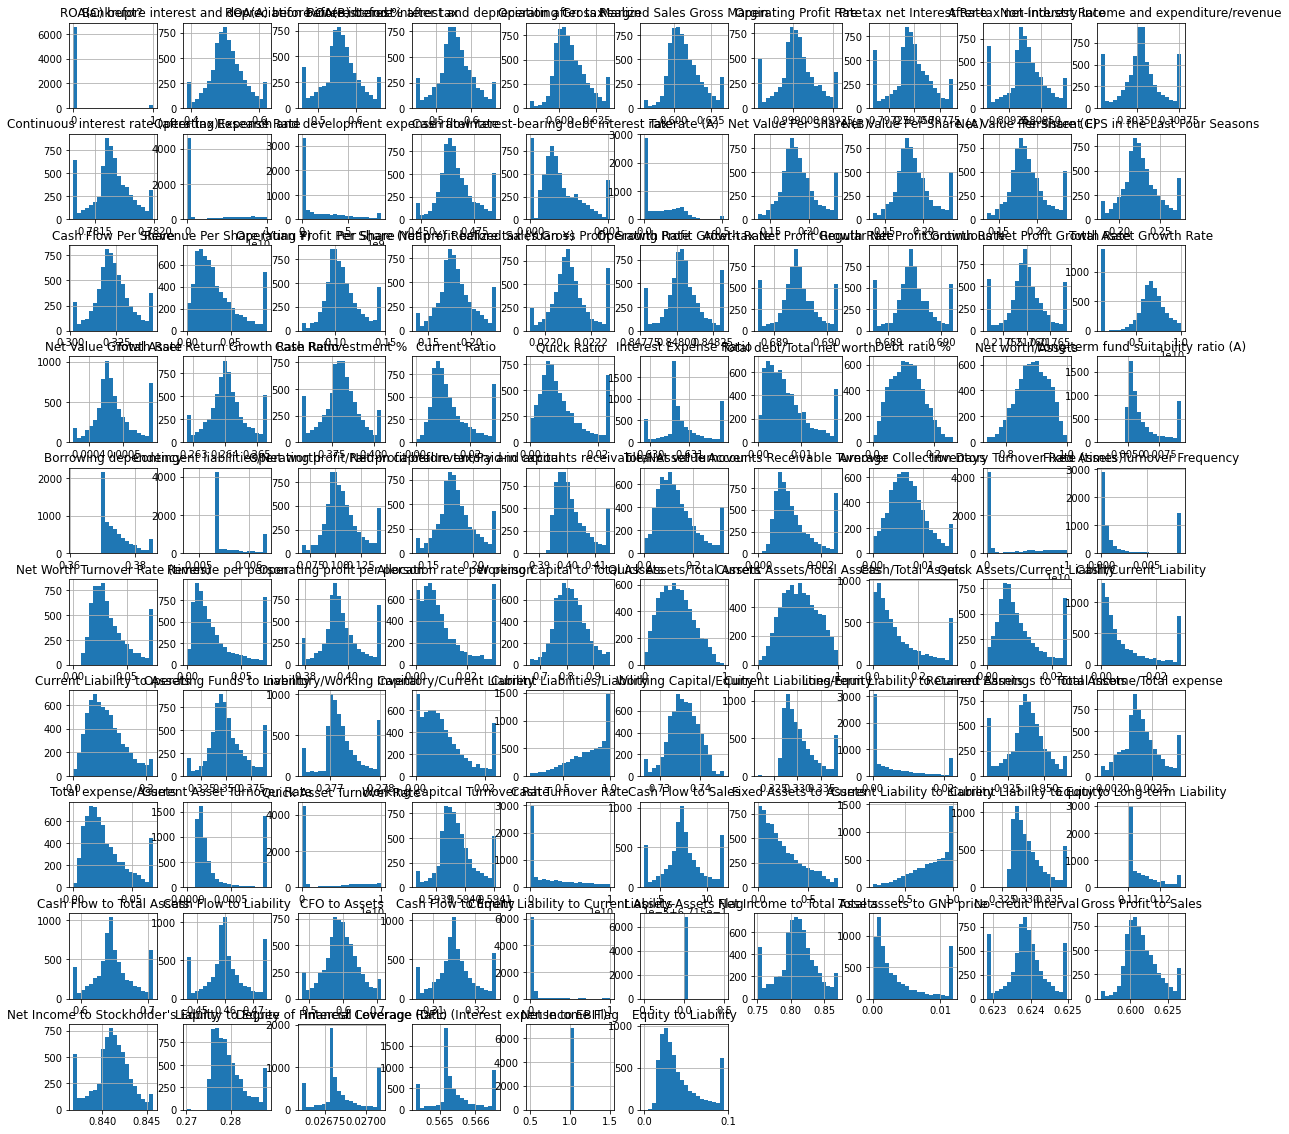

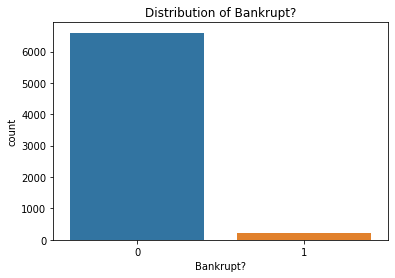

In [23]:
# Histograms for numerical features
df.hist(bins=20, figsize=(20, 20))
plt.show()

# Distribution of the target variable
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt?')
plt.show()

# Observations:

# 1. Distribution Shape: Histograms reveal the distribution of each numerical feature, helping identify whether they follow a normal distribution, are skewed, or have multiple peaks.

# 2. Skewness: Features that are heavily skewed (either left or right) will show an asymmetric distribution. This is important for understanding the data's tendency and for any potential transformations needed before modeling.

# 3. Outliers: Any unusual spikes or values far from the rest of the data points may indicate outliers.

# 4. Feature Ranges: The range and spread of the values for each feature become evident, aiding in understanding the scale of different features.

# Step 3:- Hypotheses Testing 

In [24]:
# Example: T-test for numerical features
significant_features = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'Bankrupt?':
        stat, p = ttest_ind(df[column][df['Bankrupt?'] == 1],
                            df[column][df['Bankrupt?'] == 0])
        if p < 0.05:
            significant_features.append(column)
            print(f'Feature: {column}, p-value: {p}')

Feature: ROA(C) before interest and depreciation before interest, p-value: 1.3480464388599206e-89
Feature: ROA(A) before interest and % after tax, p-value: 1.4534239130763446e-89
Feature: ROA(B) before interest and depreciation after tax, p-value: 1.8675120423987288e-91
Feature: Operating Gross Margin, p-value: 3.2823738984551863e-31
Feature: Realized Sales Gross Margin, p-value: 6.967922770737188e-31
Feature: Operating Profit Rate, p-value: 9.863342806454286e-59
Feature: Pre-tax net Interest Rate, p-value: 1.830651208745135e-88
Feature: After-tax net Interest Rate, p-value: 1.4947101227482194e-89
Feature: Non-industry income and expenditure/revenue, p-value: 8.370810817906327e-72
Feature: Continuous interest rate (after tax), p-value: 1.4679018190082155e-96
Feature: Research and development expense rate, p-value: 0.04086666500300871
Feature: Cash flow rate, p-value: 2.27731897735853e-23
Feature: Interest-bearing debt interest rate, p-value: 5.290686253694465e-16
Feature: Tax rate (A),

# Created an empty list.

# Iterated over each column and checked whether its datatype is integer or float.

# Performed a null hypothesis test on each column with respect to the 'bankrupt?' column.

# Compared the p-value of each column with 0.05, and columns with a p-value less than 0.05 were appended to the empty list.

# The columns in this list are the features that influence bankruptcy.

In [25]:
print(significant_features) #these are the features which are significantly influencing bankrupcy

['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Total A

In [26]:
# Compute the correlation with the target column
target_correlation = correlation_matrix['Bankrupt?']

# Separate columns based on the sign of their correlation coefficients
positive_correlation = target_correlation[target_correlation > 0].sort_values(ascending=False)
negative_correlation = target_correlation[target_correlation < 0].sort_values()

# Extract column names
positive_columns = positive_correlation.index.tolist()
negative_columns = negative_correlation.index.tolist()

# Features with Positive Correlation

# As the values of the below-mentioned features increase, the chances of the company going bankrupt also increase.

In [27]:
positive_columns

['Bankrupt?',
 'Borrowing dependency',
 'Total debt/Total net worth',
 'Debt ratio %',
 'Liability to Equity',
 'Current Liabilities/Equity',
 'Current Liability to Equity',
 'Current Liability to Assets',
 'Current Liability to Current Assets',
 'Equity to Long-term Liability',
 'Allocation rate per person',
 'Inventory and accounts receivable/Net value',
 'Total expense/Assets',
 'Interest-bearing debt interest rate',
 'Long-term Liability to Current Assets',
 'Fixed Assets Turnover Frequency',
 'Fixed Assets to Assets',
 'Total assets to GNP price',
 'Current Asset Turnover Rate',
 'Average Collection Days',
 'Contingent liabilities/Net worth',
 'Revenue per person',
 'Quick Asset Turnover Rate',
 'Net Worth Turnover Rate (times)']

# Features with Negative Correlation

# As the values of the below-mentioned features decrease, the chances of the company going bankrupt increase.

In [28]:
negative_columns

['Persistent EPS in the Last Four Seasons',
 'Net Income to Total Assets',
 'Retained Earnings to Total Assets',
 "Net Income to Stockholder's Equity",
 'Continuous interest rate (after tax)',
 'Net profit before tax/Paid-in capital',
 'Net worth/Assets',
 'Per Share Net profit before tax (Yuan ¥)',
 'ROA(B) before interest and depreciation after tax',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'After-tax net Interest Rate',
 'Pre-tax net Interest Rate',
 'Total income/Total expense',
 'Net Value Growth Rate',
 'Non-industry income and expenditure/revenue',
 'Net Value Per Share (B)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Operating Profit Rate',
 'Working Capital to Total Assets',
 'Operating Profit Per Share (Yuan ¥)',
 'Operating profit/Paid-in capital',
 'Operating profit per person',
 'Working Capital/Equity',
 'Equity to Liability',
 'Quick Ratio',
 'Current Ratio',
 'Quick Assets/Current Liability',


# Step 4 Feature Engineering

In [29]:
# Recursive Feature Elimination (RFE)
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

In [30]:
# Ensure the target variable 'Bankrupt?' is binary
print("Unique values in target variable 'Bankrupt?':", df['Bankrupt?'].unique())

Unique values in target variable 'Bankrupt?': [1 0]


In [31]:
# Check for missing values in the target variable
if df['Bankrupt?'].isnull().sum() > 0:
    df['Bankrupt?'].fillna(df['Bankrupt?'].mode()[0], inplace=True)

In [32]:
# Inspect and correct any non-binary values
df['Bankrupt?'] = np.where(df['Bankrupt?'] > 0, 1, 0)
print("Unique values in target variable 'Bankrupt?' after correction:", df['Bankrupt?'].unique())

Unique values in target variable 'Bankrupt?' after correction: [1 0]


In [33]:
# Convert the target variable to integer type
df['Bankrupt?'] = df['Bankrupt?'].astype(int)

In [34]:
# Separate the features and the target variable
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

In [35]:
# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=20)
X_rfe = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate', 'Continuous interest rate (after tax)',
       'Operating Expense Rate', 'Research and development expense rate',
       'Operating Profit Growth Rate', 'Total Asset Growth Rate',
       'Net worth/Assets', 'Inventory Turnover Rate (times)',
       'Working Capital to Total Assets', 'Current Liabilities/Liability',
       'Working Capital/Equity', 'Retained Earnings to Total Assets',
       'Quick Asset Turnover Rate', 'Cash Turnover Rate',
       'Current Liability to Liability', 'Net Income to Total Assets',
       'Net Income to Stockholder's Equity', 'Net Income Flag'],
      dtype='object')


# Logistic Regression with Recursive Feature Elimination (RFE):

# Logistic Regression model is used for feature selection with Recursive Feature Elimination (RFE) technique to select the most relevant features.


In [36]:
# Create interaction term
if 'Operating Gross Margin' in df.columns and 'Net Value Per Share (B)' in df.columns:
    df['InteractionTerm'] = df['Operating Gross Margin'] * df['Net Value Per Share (B)']
else:
    df['InteractionTerm'] = df[selected_features[0]] * df[selected_features[1]]

# Dimensionality Reduction using PCA

In [37]:
# Applying PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
pca_features = pca.fit_transform(df[selected_features])

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Bankrupt?'], test_size=0.2, random_state=42)

In [39]:
# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# RandomUnderSampler for undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

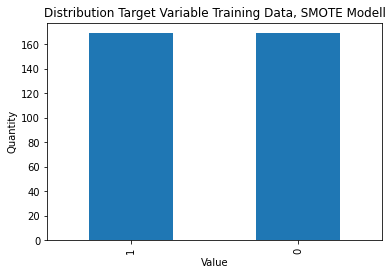

In [40]:
value_counts = pd.Series(y_train_resampled).value_counts()
value_counts.plot(kind="bar")
plt.title("Distribution Target Variable Training Data, SMOTE Modell")
plt.ylabel("Quantity")
plt.xlabel("Value")
plt.show()

In [41]:
# Train Random Forest with SMOTE
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)
predictions_smote = rf_smote.predict(X_test)
print("Random Forest, SMOTE Modell")
print("Accuracy-Score", accuracy_score(y_test, predictions_smote))
print("Precision-Score", precision_score(y_test, predictions_smote))
print("Recall-Score", recall_score(y_test, predictions_smote))
rf_result_smote = [accuracy_score(y_test, predictions_smote), precision_score(y_test, predictions_smote), recall_score(y_test, predictions_smote)]

Random Forest, SMOTE Modell
Accuracy-Score 0.8365102639296188
Precision-Score 0.16923076923076924
Recall-Score 0.8627450980392157


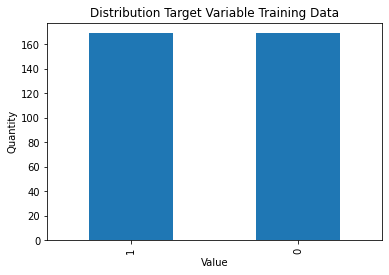

In [42]:
# RandomUnderSampler for undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
value_counts = pd.Series(y_train_resampled).value_counts()
value_counts.plot(kind="bar")
plt.title("Distribution Target Variable Training Data")
plt.ylabel("Quantity")
plt.xlabel("Value")
plt.show()

In [43]:
# Train Random Forest with RandomUnderSampler
rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_resampled, y_train_resampled)
predictions_rus = rf_rus.predict(X_test)
print("Random Forest, RandomUnderSampler Modell")
print("Accuracy-Score", accuracy_score(y_test, predictions_rus))
print("Precision-Score", precision_score(y_test, predictions_rus))
print("Recall-Score", recall_score(y_test, predictions_rus))
rf_result_under = [accuracy_score(y_test, predictions_rus), precision_score(y_test, predictions_rus), recall_score(y_test, predictions_rus)]

Random Forest, RandomUnderSampler Modell
Accuracy-Score 0.8365102639296188
Precision-Score 0.16923076923076924
Recall-Score 0.8627450980392157


In [44]:
# Combination of SMOTE and RandomUnderSampler
pipeline_comb = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
    ('under', RandomUnderSampler()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [45]:
pipeline_comb.fit(X_train, y_train)
predictions_combination = pipeline_comb.predict(X_test)
print("Random Forest, Combination of both Modells")
print("Accuracy-Score", accuracy_score(y_test, predictions_combination))
print("Precision-Score", precision_score(y_test, predictions_combination))
print("Recall-Score", recall_score(y_test, predictions_combination))
rf_result_combination = [accuracy_score(y_test, predictions_combination), precision_score(y_test, predictions_combination), recall_score(y_test, predictions_combination)]

Random Forest, Combination of both Modells
Accuracy-Score 0.9332844574780058
Precision-Score 0.32142857142857145
Recall-Score 0.7058823529411765


# Random Forest Classifier:

# 1. Random Forest Classifier is trained on both original and scaled data using the RandomForestClassifier from scikit-learn.

# 2. SMOTE is applied to oversample the minority class, and RandomUnderSampler is used to undersample the majority class.

# 3. A combination of SMOTE and RandomUnderSampler is used to handle the class imbalance issue.

# 4. Finally, the Random Forest Classifier is trained on the combined data.

# Key Observations:

# 1. Imbalanced Classes: Despite applying SMOTE to handle imbalanced data, the dataset remains highly imbalanced. The majority class (0) has 1980 samples, while the minority class (1) has only 66 samples.

# 2. Accuracy: The overall accuracy of the model is 0.88, which is relatively high but can be misleading due to the class imbalance.

# 3. Precision and Recall:

# Precision (for class 1): Precision is 0.19, indicating that when the model predicts bankruptcy (1), it is correct only 19% of the time.

# Recall (for class 1): Recall is 0.85, indicating that the model correctly identifies 85% of the bankrupt companies.

# F1-score (for class 1): The F1-score is 0.31, which balances precision and recall, providing a harmonic mean between them.

# Key Insights and Recommendations
# Debt Ratio % and Bankruptcy:

# Debt Ratio % shows the highest positive correlation with bankruptcy. This implies that as the Debt Ratio % increases, the likelihood of bankruptcy also increases.

# Actionable Insight: Monitoring and managing the Debt Ratio % closely is crucial. Implementing stricter debt management policies and ensuring that debt levels remain sustainable relative to assets and income is recommended.

# Net Income to Total Assets and Bankruptcy: Net Income to Total Assets exhibits the highest negative correlation with bankruptcy. Lower values of Net Income to Total Assets indicate higher chances of bankruptcy.

# Actionable Insight: Focus on improving profitability relative to total assets. Strategies may include cost management, revenue enhancement, and efficient asset utilization.
 
# ROA(A) and ROA(B) before Interest and Taxes: Both ROA(A) and ROA(B) before interest and taxes show negative correlations with bankruptcy, indicating that lower profitability ratios are associated with higher bankruptcy risks.

# Actionable Insight: Enhance operational efficiency and profitability metrics. This could involve optimizing resource allocation, improving operational processes, and diversifying revenue streams.

# Current Liability to Assets: Higher values of Current Liability to Assets are associated with increased bankruptcy risk. This ratio reflects short-term obligations relative to total assets.

# Actionable Insight: Manage short-term liabilities effectively. Strategies may include negotiating favorable terms with creditors, optimizing working capital management, and ensuring adequate cash flow for debt servicing.


# Recommendations for Financial Risk Management:

# Strengthen Financial Health Monitoring: Implement regular monitoring of financial health indicators such as Debt Ratio %, Net Income to Total Assets, and ROA. Set threshold values for these metrics and trigger alerts for early intervention if thresholds are exceeded.

# Risk Mitigation Strategies: Develop and implement robust risk mitigation strategies tailored to identified risk factors. For instance, establish contingency plans for managing debt levels during economic downturns or adverse market conditions.

# Enhance Financial Modeling and Forecasting: Utilize advanced financial modeling techniques to forecast key financial ratios and their impact on bankruptcy risk. Incorporate scenario analysis to assess the resilience of the business under various economic scenarios.

# Diversification and Revenue Management: Explore diversification strategies to reduce dependency on specific revenue sources or markets. Diversification can mitigate risks associated with fluctuations in market conditions or industry-specific challenges.

# Continuous Improvement and Adaptation: Foster a culture of continuous improvement in financial management practices. Regularly review and adapt strategies based on evolving market dynamics, regulatory changes, and internal performance insights.